
# ▶ **Partie 3 : Deep Learning avec Pytorch**  ◀

Dans le cadre de notre projet, nous voulons prédire la variable churner, nous avons donc deux classes possibles : soit le client est un churner, soit il ne l’est pas. Nous sommes donc dans un cas de classification binaire. 

- 1 - Importation des différents jeu d'entrainements & de tests que l'on veut  
- 2 - Encodage de la variable output & standardisation de nos données :
- 3 - Définition de DataLoader :
- 4 - Fonction d'entrainement de nos modèles :
- 5 - Fonction de Test de nos modèles :
- 6 - Fonction d'évaluation de nos modèles
- 7 - Définition de nos réseau de neuronnes :
- 8 - Première boucle :
- 9 - Division de la boucle :

▶ Importation des différentes librairies




In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')

import pandas as pd

import numpy as np
from numpy import vstack

import seaborn as sns

import matplotlib.pyplot as plt

import time

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc 

import ipywidgets as widgets

import torch
import torch.nn as nn
import torch.optim as optim

from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn.init import xavier_uniform_
from torch.nn.init import kaiming_uniform_
from torch.utils.data import Sampler


from torch.utils.data import Dataset, DataLoader

#import streamlit as st

Mounted at /content/gdrive


## ▶ 1) Importation des différents jeu d'entrainements & de tests que l'on veut tester  :
 - Données normales
 - Données mises sous formes symbolique
 - Données réduites suite à l'ACP
 - Données réduites suite à l'acp sous forme symbolique

In [ ]:
df_train = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/CHURN/DATA/churner_train_data_set.csv")
df_test = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/CHURN/DATA/churner_test_data_set.csv")

df_train_symbo = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/CHURN/DATA/Train_Var_Symbolique.csv", sep=';')
df_test_symbo = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/CHURN/DATA/Test_Var_Symbolique.csv", sep=';')

df_train_ACP = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/CHURN/DATA/trainACP.csv")
df_test_ACP = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/CHURN/DATA/testACP.csv")
df_train_ACP.drop("Unnamed: 0",axis=1, inplace=True)
df_test_ACP.drop("Unnamed: 0",axis=1, inplace=True)
df_train_ACP.rename(columns={'y' : 'churner'}, inplace=True)
df_test_ACP.rename(columns={'y.test' : 'churner'}, inplace=True)


df_train_ACP_symbo = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/CHURN/DATA/Train_Var_ACP.csv", sep=';')
df_test_ACP_symbo = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/CHURN/DATA/Test_Var_ACP.csv", sep=';')

result_tab=[]

Analyse des différents types de variable de nos données (float, int, object).

In [ ]:
df_train.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churner
count,5.799600e+04,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,...,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000
mean,7.001232e+09,233.752352,230.033168,230.029434,108.964547,110.730445,107.700828,167.137369,167.414626,163.129844,...,0.026743,0.029174,0.029157,0.029605,1284.445289,25.659964,24.569756,22.180263,0.715405,0.063004
std,6.901441e+05,202.525093,199.213719,201.897737,206.732333,212.842845,209.487135,222.265699,224.656489,220.216971,...,0.161333,0.185547,0.188454,0.192459,967.607086,109.354087,107.665348,99.705261,6.326855,0.242973
min,7.000000e+09,-147.690000,-117.528000,-50.243000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000644e+09,88.796750,86.079000,84.054750,7.830000,7.490000,6.640000,35.630000,34.260000,32.105000,...,0.000000,0.000000,0.000000,0.000000,486.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001239e+09,177.968000,174.387500,174.879500,33.040000,32.060000,30.810000,91.185000,88.710000,86.090000,...,0.000000,0.000000,0.000000,0.000000,950.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001833e+09,320.416250,316.258500,319.861250,107.680000,106.090000,102.995000,207.740000,205.965000,201.460000,...,0.000000,0.000000,0.000000,0.000000,1989.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,1578.078000,1620.116000,1655.578000,2129.290000,2138.080000,2173.830000,2059.160000,2189.440000,2153.710000,...,1.000000,2.000000,2.000000,2.000000,4299.000000,1133.270000,1151.050000,1069.480000,132.840000,1.000000


In [ ]:
df_train_symbo.describe()

,arpu_6_arpu_6-1,arpu_6_arpu_6-2,arpu_6_arpu_6-3,arpu_7_arpu_7-1,arpu_7_arpu_7-2,arpu_7_arpu_7-3,arpu_8_arpu_8-1,arpu_8_arpu_8-2,arpu_8_arpu_8-3,onnet_mou_6_onnet_mou_6-1,...,jul_vbc_3g_jul_vbc_3g-1,jul_vbc_3g_jul_vbc_3g-2,jul_vbc_3g_jul_vbc_3g-3,jun_vbc_3g_jun_vbc_3g-1,jun_vbc_3g_jun_vbc_3g-2,jun_vbc_3g_jun_vbc_3g-3,sep_vbc_3g_sep_vbc_3g-1,sep_vbc_3g_sep_vbc_3g-2,sep_vbc_3g_sep_vbc_3g-3,churner
count,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,...,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000
mean,0.106766,0.881561,0.011673,0.150717,0.840092,0.009190,0.268553,0.723326,0.008121,0.609404,...,0.909994,0.078781,0.011225,0.914270,0.074126,0.011604,0.968687,0.028467,0.002845,0.063004
std,0.308818,0.323130,0.107411,0.357776,0.366523,0.095425,0.443211,0.447358,0.089752,0.487888,...,0.286193,0.269399,0.105352,0.279967,0.261978,0.107097,0.174162,0.166306,0.053263,0.242973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_train_ACP.describe()

,Axis1,Axis2,Axis3,Axis4,Axis5,Axis6,Axis7,Axis8,Axis9,Axis10,...,Axis15,Axis16,Axis17,Axis18,Axis19,Axis20,Axis21,Axis22,Axis23,Axis24
count,5.799600e+04,5.799600e+04,5.799600e+04,5.799600e+04,5.799600e+04,5.799600e+04,5.799600e+04,5.799600e+04,5.799600e+04,5.799600e+04,...,5.799600e+04,5.799600e+04,5.799600e+04,5.799600e+04,5.799600e+04,5.799600e+04,5.799600e+04,5.799600e+04,5.799600e+04,5.799600e+04
mean,1.431002e-09,-4.979473e-10,-4.766435e-10,-2.332284e-09,-4.933916e-10,1.200063e-10,-7.092414e-11,3.692731e-11,-6.612517e-10,1.264569e-09,...,2.184862e-11,-4.994969e-11,-3.639636e-11,3.932985e-10,5.839939e-10,-8.571098e-10,4.054559e-10,-2.632359e-10,5.037804e-10,-8.503153e-10
std,4.132200e+00,3.228919e+00,2.414091e+00,2.378188e+00,2.027509e+00,1.951181e+00,1.805079e+00,1.758115e+00,1.728281e+00,1.701028e+00,...,1.494015e+00,1.454545e+00,1.364892e+00,1.324321e+00,1.297191e+00,1.288260e+00,1.282078e+00,1.249140e+00,1.246905e+00,1.208549e+00
min,-2.751573e+01,-1.910777e+01,-1.017176e+01,-1.506570e+01,-1.855924e+01,-4.975860e+01,-1.101098e+01,-9.773571e+01,-2.245446e+02,-8.006784e+01,...,-2.667986e+01,-2.670359e+01,-1.172517e+01,-3.490276e+01,-6.770767e+01,-4.146402e+01,-1.976396e+01,-1.056893e+02,-2.368070e+01,-2.699652e+01
25%,-1.867951e+00,-1.276403e+00,-1.052896e+00,-9.179010e-01,-8.204229e-01,-9.421663e-01,-7.866563e-01,-7.255389e-01,-3.002037e-01,-2.725208e-01,...,-5.628498e-01,-5.577406e-01,-4.979528e-01,-4.969438e-01,-3.080715e-01,-5.241370e-01,-5.890350e-01,-3.302556e-01,-2.240090e-01,-2.268539e-01
50%,1.097792e+00,2.827586e-01,-5.095752e-01,-4.756625e-01,-7.928425e-02,1.066157e-01,-2.870188e-02,-3.522926e-02,1.612433e-01,2.356628e-01,...,9.624660e-02,-1.454837e-02,2.664937e-02,4.841749e-02,2.689887e-02,-1.608296e-02,5.551925e-03,-5.248050e-02,8.445251e-02,-9.438063e-02
75%,3.025600e+00,1.634300e+00,1.844810e-01,3.765644e-01,7.339678e-01,1.024377e+00,7.285886e-01,7.193551e-01,4.897444e-01,6.144836e-01,...,6.775844e-01,6.212612e-01,4.555090e-01,5.632329e-01,2.995873e-01,4.832636e-01,5.865288e-01,2.724135e-01,3.385648e-01,1.826557e-01
max,5.683734e+00,1.557566e+01,1.855397e+01,3.931896e+01,1.630886e+01,3.403896e+01,6.483256e+01,1.771905e+01,2.499196e+01,7.569762e+00,...,1.620688e+01,2.241299e+01,2.350073e+01,2.386558e+01,3.076942e+01,2.059318e+01,1.966192e+01,3.232858e+01,1.236612e+02,1.176653e+02


In [ ]:
df_train_ACP_symbo.describe()

,Axis1_Axis1-1,Axis1_Axis1-2,Axis1_Axis1-3,Axis2_Axis2-1,Axis2_Axis2-2,Axis2_Axis2-3,Axis3_Axis3-1,Axis3_Axis3-2,Axis3_Axis3-3,Axis4_Axis4-1,...,Axis22_Axis22-1,Axis22_Axis22-2,Axis22_Axis22-3,Axis23_Axis23-1,Axis23_Axis23-2,Axis23_Axis23-3,Axis24_Axis24-1,Axis24_Axis24-2,Axis24_Axis24-3,churner
count,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.00000,57996.000000,...,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000,57996.000000
mean,0.011121,0.712566,0.276312,0.013604,0.975119,0.011277,0.003569,0.982361,0.01407,0.001638,...,0.000017,0.999655,0.000328,0.000621,0.999362,0.000017,0.000103,0.999862,0.000034,0.063004
std,0.104871,0.452569,0.447177,0.115843,0.155764,0.105592,0.059637,0.131637,0.11778,0.040440,...,0.004152,0.018567,0.018097,0.024907,0.025250,0.004152,0.010171,0.011744,0.005872,0.242973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 ▶ Vérification de la distribution de la variable "churn" dans les différents jeux de données :
-  Environ 1/10 de churner par jeu 

Jeu de Train : nombre de 0 : 54342
Jeu de Train : nombre de 1 : 3654
Jeu de Test : nombre de 0 : 13586
Jeu de Test : nombre de 1 : 913



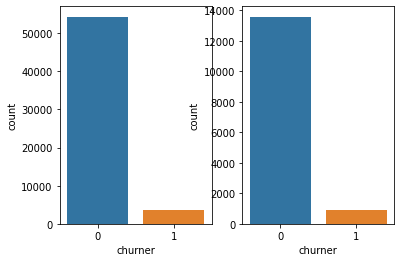

In [ ]:
fig, ax =plt.subplots(1,2)
sns.countplot(x = "churner", data=df_train, ax=ax[0])
sns.countplot(x = "churner", data=df_test, ax=ax[1])
fig.show()

print("Jeu de Train : nombre de 0 : " + str(np.sum(df_train['churner'] == 0)))
print("Jeu de Train : nombre de 1 : " + str(np.sum(df_train['churner'] == 1)))
print("Jeu de Test : nombre de 0 : " + str(np.sum(df_test['churner'] == 0)))
print("Jeu de Test : nombre de 1 : " + str(np.sum(df_test['churner'] == 1)))
print("")

Jeu de Train : nombre de 0 : 54342
Jeu de Train : nombre de 1 : 3654
Jeu de Test : nombre de 0 : 13586
Jeu de Test : nombre de 1 : 913



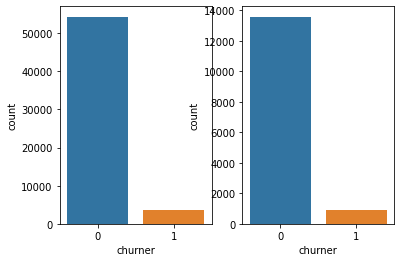

In [ ]:
fig, ax =plt.subplots(1,2)
sns.countplot(x = "churner", data=df_train_symbo, ax=ax[0])
sns.countplot(x = "churner", data=df_test_symbo, ax=ax[1])
fig.show()

print("Jeu de Train : nombre de 0 : " + str(np.sum(df_train_symbo['churner'] == 0)))
print("Jeu de Train : nombre de 1 : " + str(np.sum(df_train_symbo['churner'] == 1)))
print("Jeu de Test : nombre de 0 : " + str(np.sum(df_test_symbo['churner'] == 0)))
print("Jeu de Test : nombre de 1 : " + str(np.sum(df_test_symbo['churner'] == 1)))
print("")

Jeu de Train : nombre de 0 : 54342
Jeu de Train : nombre de 1 : 3654
Jeu de Test : nombre de 0 : 13586
Jeu de Test : nombre de 1 : 913



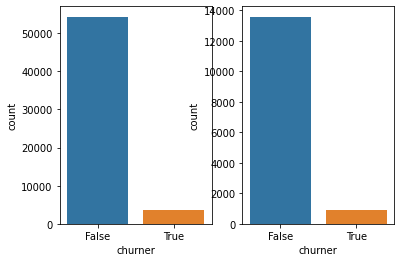

In [ ]:
fig, ax =plt.subplots(1,2)
sns.countplot(x = "churner", data=df_train_ACP, ax=ax[0])
sns.countplot(x = "churner", data=df_test_ACP, ax=ax[1])
fig.show()

print("Jeu de Train : nombre de 0 : " + str(np.sum(df_train_ACP['churner'] == 0)))
print("Jeu de Train : nombre de 1 : " + str(np.sum(df_train_ACP['churner'] == 1)))
print("Jeu de Test : nombre de 0 : " + str(np.sum(df_test_ACP['churner'] == 0)))
print("Jeu de Test : nombre de 1 : " + str(np.sum(df_test_ACP['churner'] == 1)))
print("")

Jeu de Train : nombre de 0 : 54342
Jeu de Train : nombre de 1 : 3654
Jeu de Test : nombre de 0 : 13586
Jeu de Test : nombre de 1 : 913



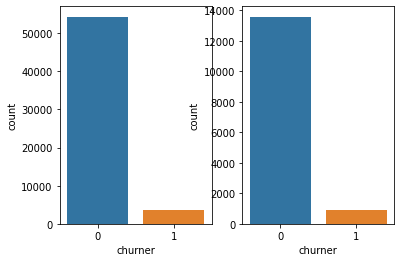

In [ ]:
fig, ax =plt.subplots(1,2)
sns.countplot(x = "churner", data=df_train_ACP_symbo, ax=ax[0])
sns.countplot(x = "churner", data=df_test_ACP_symbo, ax=ax[1])
fig.show()

print("Jeu de Train : nombre de 0 : " + str(np.sum(df_train_ACP_symbo['churner'] == 0)))
print("Jeu de Train : nombre de 1 : " + str(np.sum(df_train_ACP_symbo['churner'] == 1)))
print("Jeu de Test : nombre de 0 : " + str(np.sum(df_test_ACP_symbo['churner'] == 0)))
print("Jeu de Test : nombre de 1 : " + str(np.sum(df_test_ACP_symbo['churner'] == 1)))
print("")

## ▶ 2) Encodage de la variable output & standardisation de nos données : 

Pour chaque jeu :
- Nos dernières colonnes est notre variable à expliquer 
- Le reste sont nos variables explicatives 

Pour que nos réseaux de neuronnes apprennent correctement il faut standardiser nos variables entrantes. On utilise le module *StandarScaler* de sklearn qui :  
- Supprime la moyenne de la colonne 
- Divise par l'écart type 

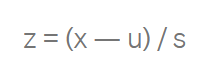

In [ ]:
x_train = df_train.iloc[:, 1:-1]
y_train = df_train.iloc[:, -1]
x_test = df_test.iloc[:, 1:-1] 
y_test = df_test.iloc[:, -1]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

(57996, 131) (57996,) (14499, 131) (14499,)


In [ ]:
x_train_symbo = df_train_symbo.iloc[:, 3:-1]
y_train_symbo = df_train_symbo.iloc[:, -1]
x_test_symbo = df_test_symbo.iloc[:, 3:-1] 
y_test_symbo = df_test_symbo.iloc[:, -1]

print(x_train_symbo.shape, y_train_symbo.shape, x_test_symbo.shape, y_test_symbo.shape)

scaler = StandardScaler()
x_train_symbo = scaler.fit_transform(x_train_symbo)
x_test_symbo = scaler.fit_transform(x_test_symbo)

(57996, 366) (57996,) (14499, 366) (14499,)


In [ ]:
x_train_ACP = df_train_ACP.iloc[:, 1:-1]
y_train_ACP = df_train_ACP.iloc[:, -1]
x_test_ACP = df_test_ACP.iloc[:, 1:-1] 
y_test_ACP = df_test_ACP.iloc[:, -1]

print(x_train_ACP.shape, y_train_ACP.shape, x_test_ACP.shape, y_test_ACP.shape)

scaler = StandardScaler()
x_train_ACP = scaler.fit_transform(x_train_ACP)
x_test_ACP = scaler.fit_transform(x_test_ACP)

(57996, 23) (57996,) (14499, 23) (14499,)


In [ ]:
x_train_ACP_symbo = df_train_ACP_symbo.iloc[:, 3:-1]
y_train_ACP_symbo = df_train_ACP_symbo.iloc[:, -1]
x_test_ACP_symbo = df_test_ACP_symbo.iloc[:, 3:-1] 
y_test_ACP_symbo = df_test_ACP_symbo.iloc[:, -1]

print(x_train_ACP_symbo.shape, y_train_ACP_symbo.shape, x_test_ACP_symbo.shape, y_test_ACP_symbo.shape)


scaler = StandardScaler()
x_train_ACP_symbo = scaler.fit_transform(x_train_ACP_symbo)
x_test_ACP_symbo = scaler.fit_transform(x_test_ACP_symbo)

(57996, 69) (57996,) (14499, 69) (14499,)


 ## ▶ 3) Définition de DataLoader :

 L'utilisation de DataLoader particulier va permettre de lire nos données sous formes de tuples (batchs) en permettant d'accéder facilement à certains de leurs attributs. 
 - 3 composants principals :    
- __ init __ : initialise les opérations qui "lit" les données
- __ getitem __ : renvoi la valeur d'un batch
- __ len __ : renvoi la taille de la donnée en input

In [ ]:
class TrainData(Dataset):
  def __init__(self, x_data, y_data):
    self.x_data = x_data
    self.y_data = y_data

  def __getitem__(self, index):
    return self.x_data[index], self.y_data[index]

  def __len__(self):
    return len(self.x_data)

class TestData(Dataset):
  def __init__(self, x_data, y_data):
    self.x_data = x_data
    self.y_data = y_data

  def __getitem__(self, index):
    return self.x_data[index], self.y_data[index]

  def __len__(self):
    return len(self.x_data)



## ▶ 4) Fonction d'entrainement de nos modèles : 

Pour entrainer notre modèle nous avons créé une fonction (basé sur le model.train() de Pytorch) va, en fonction du nombre d’Epochs et des différentes données qui composent nos batchs, effectuer une prédiction sur ce dernier. 

On calcul la perte et l’accuracy et on applique la propagation arrière de la fonction de perte ainsi que notre algorithme de propagation. De ce fait, à chaque début de boucle on remet l’optimizer à 0 (optimizer.zero_grad()) puisque, la fonction backward accumule les différents gradients. 

A la fin de chaque Epoch, on accumule l’ensemble des pertes des batchs et on obtient la « perte moyenne » et « l’accuracy moyenne » de l’Epoch. On répète cette démarche jusqu’à temps que tous les epochs soient passés.


In [ ]:
def train_model(EPOCHS, model, train_loader, x_train, y_train):
  #on lance le modèle en mode train
  model.train()
  losses = []
  #on parcourt nos EPOCHS
  for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    #pour chaque EPOCH, on parcours chaque batchs
    for x_batch, y_batch in train_loader:
      start_time = time.time()

      #on remet le stockage des gradients à 0
      optimizer.zero_grad()

      #prédiction de notre variable churner sur les données du batchs
      y_pred = model(x_batch)

      #on applique la fonction de perte et on récupère sa valeur
      loss = criterion(y_pred, y_batch.reshape(-1,1))

      predicted = model(torch.tensor(x_train, dtype=torch.float32))
      
      #calcul de l'accuracy
      acc = (predicted.reshape(-1).detach().numpy().round()==y_train).mean()
      
      #torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5 )

      # calcul du gradient et rétropropagation
      loss.backward()
      # maj des poids synaptiques 
      optimizer.step()

      #on stock la loss et l'accuracy du batchs
      epoch_loss += loss.item()
      #epoch_acc += accc.item()
      epoch_acc += acc

      
    if(e == 1):
      print("")
      print ("Temps pour 1 epoch :  %s" % round((time.time() - start_time),2) +"m")
      print ("Estimation du temps de traitement : %s" % round(((time.time() - start_time)*EPOCHS),2) +"m")
      print("")
    #calcul de la perte moyenne sur l'ens batchs  
    losses.append(epoch_loss/len(train_loader))
    print(f'Epoch {e+0:03}:| Loss: {epoch_loss/len(train_loader):.5f} | Acc : {epoch_acc/len(train_loader):.3f}')
  return losses


## ▶ 5) Fonction de Test de nos modèles :

Après que notre modèle est finit de s’entrainer, il faut le tester pour vérifier que notre modèle est performant (sous le même principe, grâce à model.eval() de Pytorch). 

On créer une boucle qui va passer chaque batchs de notre jeu de test, et sur le même principe renvoyer la prédiction trouvée ainsi que la valeur actuelle

On retourne la valeur prédite et la valeur réelle pour l'utiliser par la suite dans les métrics. 


In [ ]:
def eval_model(model, test_loader):
  pred, actuals = list(), list()
  #on passe en mode test
  model.eval()

  #on parcours l'ensemble des batchs du loader test
  for i, (x, y) in enumerate(test_loader):
    #on récupère la prédiction et on la reshape pour l'utiliser
    y_pred = model(x)
    y_pred = y_pred.detach().numpy()
    
    #on récupère la valeur réelle et on la reshape pour l'utiliser
    actual = y.numpy()
    actual = actual.reshape((len(actual), 1))

    y_pred = y_pred.round()

    pred.append(y_pred)
    actuals.append(actual)
  pred, actuals = vstack(pred), vstack(actuals)
  return pred, actuals

## ▶ 6) Fonction d'évaluation de nos modèles :

Pour évaluer nos modèles on utilise plusieurs métrics se basant sur les valeurs prédites et les valeurs réelles :
- l'accuracy
- l'error-rate
- la sensitivité
- la sensibilité
- la F-mesure
- la précision 

In [ ]:
def metric(pred, actuals, tab):
  tn, fp, fn, tp = confusion_matrix(actuals, pred).ravel()

  tab.append(tn)
  tab.append(tp)
  tab.append(fp)
  tab.append(fn)

  AUC=accuracy_score(actuals, pred)
  sensitivity = tn / (tn+fp)
  specificity = tp / (tp+fn)
  precision = tn / (tn + fn)
  error_rate = 1 - AUC
  F_mesure = 2 * sensitivity * precision / (sensitivity + precision)
  print("AUC : ", AUC)
  print("Sensibilité : ", sensitivity)  
  print("Spécificité : ", specificity)
  print("Précision : ", precision)
  print("Error rate : ", error_rate)
  print("F mesure : ", F_mesure)

  tab.append(round(AUC,2))
  tab.append(round(sensitivity,2))
  tab.append(round(specificity,2))
  tab.append(round(precision,2))
  tab.append(round(error_rate,2))
  tab.append(round(F_mesure,2))

  print("")
  fpr_keras, tpr_keras, thresholds_keras=roc_curve(actuals,pred) 
  plt.plot(fpr_keras,tpr_keras,label='Keras Model(area={:.3f})'.format(AUC)) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.title('ROC curve') 
  plt.legend(loc='best') 
  plt.show() 

  cm = confusion_matrix(actuals, pred)
  cm_matrix = pd.DataFrame(data=cm, columns=[ ' Normal case: 0','Actual case: 1'],  
                                  index=[ 'Predict normal case: 0','Predict case: 1']) 
  sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu') 

  return tab

## ▶ 7) Définition de nos réseau de neuronnes :

Pour découvrir et comparer différents éléments d'un réseaux de neuronnes nous avons créer deux réseaux de neuronnes (un simple et un plus développé).

Nous définissons nos MLP sous forme de classes (grâce à la classe nn.Module) :
- __init__() : défini les différents layers, 
- forward() : fait passer les différentes caractéristiques dans nos layers automatiquement.

Nous sommes en classification binaire donc :

- notre output est forcément 0/1, donc on utilise une fonction d'activation *Sigmoid* sur le dernier layer

▶ MLP_simple : 
- 0 couche caché 
- 1 output
- BCELoss
- SGD

▶ MLP_big : 
- 3 couche caché (500 neuronnes par couches) 
- 1 output
- BCELoss
- SGD
- Dropout : 0.1

In [ ]:
class MLP_simple(nn.Module):
    # define model elements
    def __init__(self, n_inputs, output_size):
        super(MLP_simple, self).__init__()

        self.hidden1 = nn.Linear(n_inputs, output_size)
        #kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = Sigmoid()

        
    # forward propagate input
    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        return X

In [ ]:
class MLP_big(nn.Module):
    # define model elements
    def __init__(self, n_inputs, output_size):
        super(MLP_big, self).__init__()

        self.hidden1 = nn.Linear(n_inputs, 500)
        #kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()

        self.hidden2 = nn.Linear(500, 500)
        #kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        self.dropout2 = nn.Dropout(p = 0.1)

        self.hidden3 = nn.Linear(500, 500)
        #kaiming_uniform_(self.hidden3.weight, nonlinearity='relu')
        self.act3 = ReLU()
        self.dropout3 = nn.Dropout(p = 0.1)

        self.hidden4 = nn.Linear(500, 50)
        #kaiming_uniform_(self.hidden4.weight, nonlinearity='relu')
        self.act4 = ReLU()
        self.dropout4 = nn.Dropout(p = 0.1)

        self.hidden5 = nn.Linear(50, output_size)
        #xavier_uniform_(self.hidden5.weight)
        self.act5 = Sigmoid()
 
    # forward propagate input
    def forward(self, X):
      
        X = self.hidden1(X)
        X = self.act1(X)
        
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.dropout2(X)

        X = self.hidden3(X)
        X = self.act3(X)
        X = self.dropout3(X)

        X = self.hidden4(X)
        X = self.act4(X)
        X = self.dropout4(X)

        X = self.hidden5(X)
        X = self.act5(X)
        return X

## ▶ 8) Première boucle :

Notre première idée était de faire une grosse boucle qui parcours :
- l'ensemble des bases,
- l'ensemble des modèles,
- fait varier le nombre d'EPOCHS
- renvoie pour chaque itérations, les métrics

Avec collab version gratuite la boucle prend trop de temps et le serveur se déconnecte donc abandon de la méthode. 

In [ ]:
EPOCH_LIST = [1, 5, 50, 100]
MODEL_LIST = ["simple", "big"]
BASE = ["NORMAL", "NORMAL SYMBO", "ACP", "ACP SYMBO"]

BATCH_SIZE = 1024
LEARNING_RATE = 0.01
MOMENTUM = 0.9
OUTPUT_SIZE = 1

for element in BASE :
  
  if(element == "NORMAL"):
    train_data = TrainData(torch.FloatTensor(x_train), torch.FloatTensor(y_train))
    test_data = TestData(torch.FloatTensor(x_test), torch.FloatTensor(y_test))
    INPUT_SIZE = 131
  elif (element == "NORMAL SYMBO"):
    train_data = TrainData(torch.FloatTensor(x_train_symbo), torch.FloatTensor(y_train_symbo))
    test_data = TestData(torch.FloatTensor(x_test_symbo), torch.FloatTensor(y_test_symbo))
    INPUT_SIZE = 366
  elif(element == "ACP"):
    train_data = TrainData(torch.FloatTensor(x_train_ACP), torch.FloatTensor(y_train_ACP))
    test_data = TestData(torch.FloatTensor(x_test_ACP), torch.FloatTensor(y_test_ACP))
    INPUT_SIZE = 23
  elif(element == "ACP SYMBO"):
    train_data = TrainData(torch.FloatTensor(x_train_ACP_symbo), torch.FloatTensor(y_train_ACP_symbo))
    test_data = TestData(torch.FloatTensor(x_test_ACP_symbo), torch.FloatTensor(y_test_ACP_symbo))
    INPUT_SIZE = 69
  else :
    print("Probleme base")
    pass

  class_count = np.array([np.sum(y_train == 0),np.sum(y_train == 1)])
  weight = 1./class_count
  samples_weight = np.array([weight[t] for t in y_train])
  samples_weight = torch.from_numpy(samples_weight)
  sampler = torch.utils.data.sampler.WeightedRandomSampler(samples_weight, len(samples_weight))

  train_loader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, sampler = sampler)
  test_loader = DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle = False)




  for element_bis in MODEL_LIST :
    if(element_bis == "simple"):
      model = MLP_simple(INPUT_SIZE, OUTPUT_SIZE)
    elif(element_bis == "big"):
      model = MLP_big(INPUT_SIZE, OUTPUT_SIZE)
    else : 
      print("prblm model")
      pass

    for element_ter in EPOCH_LIST :

      print(element, " " , element_bis, " ", element_ter, " ")
      print("")

      start_time_exec = time.time()

      tab = []
      tab.append(element)
      tab.append(INPUT_SIZE)
      tab.append(OUTPUT_SIZE)
      tab.append(element_bis)
      

      EPOCHS = element_ter
      tab.append(EPOCHS)

      criterion = nn.BCELoss()
      optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum = MOMENTUM)
      
      tab.append("BCELoss")
      tab.append("SGD")

      losses = train_model(EPOCHS, model, train_loader)

      print("")
      plt.plot(losses)
      plt.title("Evolution de la fonction de perte")
      plt.xlabel("EPOCHS")
      plt.ylabel("Loss")
      plt.show()
      print("")
      
      pred, actuals = eval_model(model, test_loader)

      tab = metric(pred, actuals, tab)
      
      temps_exec = round((time.time() - start_time_exec),2)
      tab.append(temps_exec)

      result_tab.append(tab)
      print("")
      print("")
      print("")
      print("")
      print("")

## ▶ 9) Division de la boucle :

Pour rendre notre programme compilable on a divisé en 4 sous boucle (les 4 bases). 

*Les 4 boucles sont identiques, seuls le nombre d'input et la base changent. *

NORMAL   simple   1  


Temps pour 1 epoch :  0.02m
Estimation du temps de traitement : 0.02m

Epoch 001:| Loss: 0.57214 | Acc : 0.557



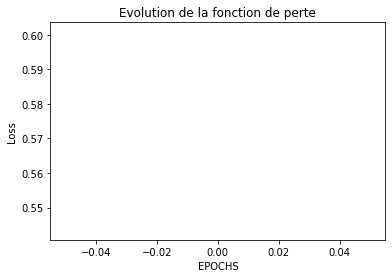


AUC :  0.6552865714876888
Sensibilité :  0.6403650817017518
Spécificité :  0.8773274917853231
Précision :  0.9872900590104403
Error rate :  0.34471342851231124
F mesure :  0.7768550763461024



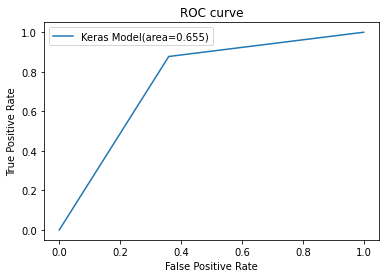






NORMAL   simple   5  


Temps pour 1 epoch :  0.02m
Estimation du temps de traitement : 0.12m

Epoch 001:| Loss: 0.50146 | Acc : 0.687
Epoch 002:| Loss: 0.48698 | Acc : 0.730
Epoch 003:| Loss: 0.47640 | Acc : 0.746
Epoch 004:| Loss: 0.47056 | Acc : 0.754
Epoch 005:| Loss: 0.47014 | Acc : 0.760



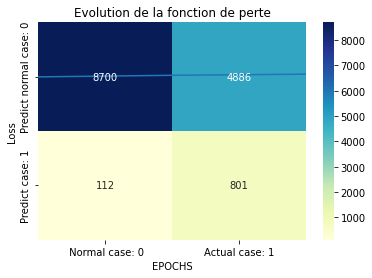


AUC :  0.760466239050969
Sensibilité :  0.7548211394082144
Spécificité :  0.8444687842278203
Précision :  0.9863422141002213
Error rate :  0.239533760949031
F mesure :  0.8551890922736939



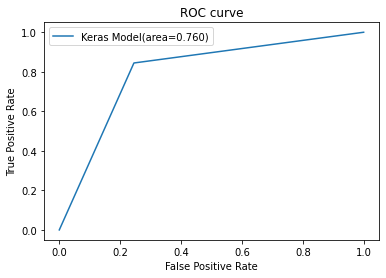






NORMAL   simple   50  


Temps pour 1 epoch :  0.01m
Estimation du temps de traitement : 0.72m

Epoch 001:| Loss: 0.47423 | Acc : 0.765
Epoch 002:| Loss: 0.47648 | Acc : 0.765
Epoch 003:| Loss: 0.47355 | Acc : 0.766
Epoch 004:| Loss: 0.46904 | Acc : 0.769
Epoch 005:| Loss: 0.46836 | Acc : 0.770
Epoch 006:| Loss: 0.47025 | Acc : 0.766
Epoch 007:| Loss: 0.46940 | Acc : 0.768
Epoch 008:| Loss: 0.46698 | Acc : 0.769
Epoch 009:| Loss: 0.46465 | Acc : 0.768
Epoch 010:| Loss: 0.46358 | Acc : 0.768
Epoch 011:| Loss: 0.46689 | Acc : 0.771
Epoch 012:| Loss: 0.46360 | Acc : 0.772
Epoch 013:| Loss: 0.47011 | Acc : 0.771
Epoch 014:| Loss: 0.47213 | Acc : 0.772
Epoch 015:| Loss: 0.46826 | Acc : 0.770
Epoch 016:| Loss: 0.46675 | Acc : 0.768
Epoch 017:| Loss: 0.46693 | Acc : 0.769
Epoch 018:| Loss: 0.46516 | Acc : 0.770
Epoch 019:| Loss: 0.46926 | Acc : 0.771
Epoch 020:| Loss: 0.46551 | Acc : 0.771
Epoch 021:| Loss: 0.46839 | Acc : 0.773
Epoch 022:| Loss: 0.46372 | Acc : 0.768
Epoch 023:| Loss: 0

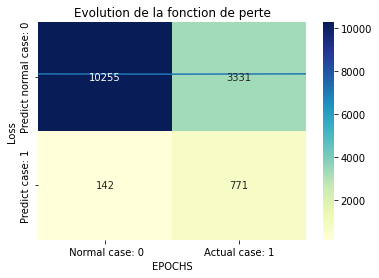


AUC :  0.7672942961583558
Sensibilité :  0.7619608420432799
Spécificité :  0.8466593647316539
Précision :  0.9866565001906215
Error rate :  0.23270570384164424
F mesure :  0.8598720823988704



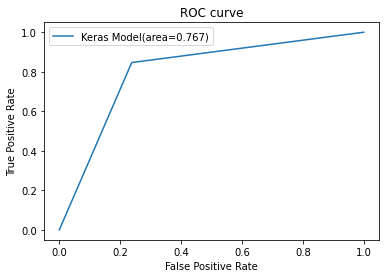






NORMAL   simple   100  


Temps pour 1 epoch :  0.02m
Estimation du temps de traitement : 2.03m

Epoch 001:| Loss: 0.47303 | Acc : 0.773
Epoch 002:| Loss: 0.46537 | Acc : 0.768
Epoch 003:| Loss: 0.46573 | Acc : 0.770
Epoch 004:| Loss: 0.46616 | Acc : 0.771
Epoch 005:| Loss: 0.46903 | Acc : 0.775
Epoch 006:| Loss: 0.46298 | Acc : 0.768
Epoch 007:| Loss: 0.46776 | Acc : 0.774
Epoch 008:| Loss: 0.46720 | Acc : 0.771
Epoch 009:| Loss: 0.46623 | Acc : 0.771
Epoch 010:| Loss: 0.46881 | Acc : 0.773
Epoch 011:| Loss: 0.46172 | Acc : 0.769
Epoch 012:| Loss: 0.46894 | Acc : 0.770
Epoch 013:| Loss: 0.46226 | Acc : 0.768
Epoch 014:| Loss: 0.46484 | Acc : 0.770
Epoch 015:| Loss: 0.46981 | Acc : 0.771
Epoch 016:| Loss: 0.46296 | Acc : 0.770
Epoch 017:| Loss: 0.46769 | Acc : 0.768
Epoch 018:| Loss: 0.46620 | Acc : 0.770
Epoch 019:| Loss: 0.46728 | Acc : 0.770
Epoch 020:| Loss: 0.46351 | Acc : 0.772
Epoch 021:| Loss: 0.46043 | Acc : 0.770
Epoch 022:| Loss: 0.46495 | Acc : 0.772
Epoch 023:| Loss: 

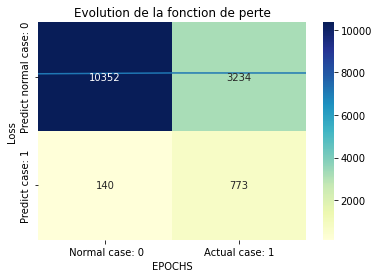


AUC :  0.7706738395751431
Sensibilité :  0.765567495951715
Spécificité :  0.8466593647316539
Précision :  0.9867185276539228
Error rate :  0.22932616042485687
F mesure :  0.8621875906660589



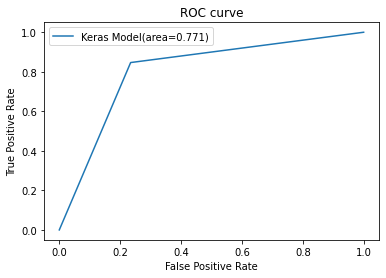






NORMAL   big   1  


Temps pour 1 epoch :  1.43m
Estimation du temps de traitement : 1.43m

Epoch 001:| Loss: 0.68975 | Acc : 0.239



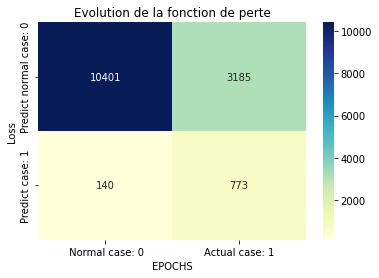


AUC :  0.5180357266018346
Sensibilité :  0.49580450463712644
Spécificité :  0.8488499452354874
Précision :  0.9799243526331103
Error rate :  0.4819642733981654
F mesure :  0.658455522971652



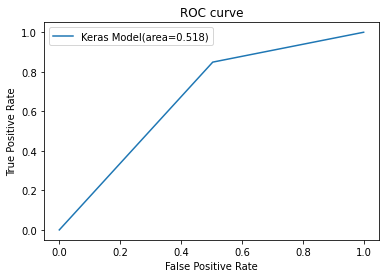






NORMAL   big   5  


Temps pour 1 epoch :  1.45m
Estimation du temps de traitement : 7.25m

Epoch 001:| Loss: 0.67130 | Acc : 0.635
Epoch 002:| Loss: 0.58171 | Acc : 0.701
Epoch 003:| Loss: 0.48037 | Acc : 0.784
Epoch 004:| Loss: 0.44660 | Acc : 0.812
Epoch 005:| Loss: 0.42187 | Acc : 0.817



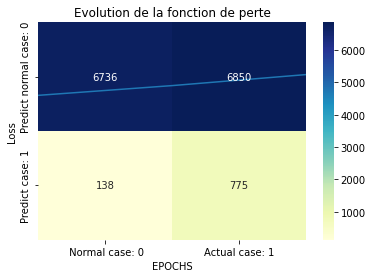


AUC :  0.8101248361955997
Sensibilité :  0.8103194464890329
Spécificité :  0.8072289156626506
Précision :  0.9842646401430487
Error rate :  0.18987516380440028
F mesure :  0.8888619756973882



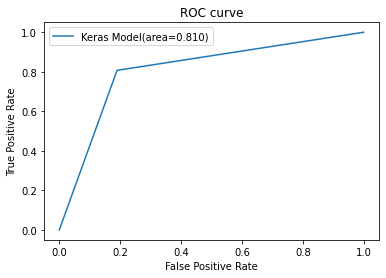






NORMAL   big   50  


Temps pour 1 epoch :  1.54m
Estimation du temps de traitement : 77.14m

Epoch 001:| Loss: 0.41307 | Acc : 0.822
Epoch 002:| Loss: 0.41052 | Acc : 0.830
Epoch 003:| Loss: 0.39639 | Acc : 0.830
Epoch 004:| Loss: 0.38649 | Acc : 0.836
Epoch 005:| Loss: 0.37221 | Acc : 0.838
Epoch 006:| Loss: 0.36684 | Acc : 0.844
Epoch 007:| Loss: 0.35888 | Acc : 0.847
Epoch 008:| Loss: 0.34506 | Acc : 0.852
Epoch 009:| Loss: 0.33190 | Acc : 0.857
Epoch 010:| Loss: 0.31594 | Acc : 0.859
Epoch 011:| Loss: 0.31209 | Acc : 0.863
Epoch 012:| Loss: 0.29785 | Acc : 0.867
Epoch 013:| Loss: 0.29442 | Acc : 0.872
Epoch 014:| Loss: 0.27413 | Acc : 0.878
Epoch 015:| Loss: 0.26089 | Acc : 0.882
Epoch 016:| Loss: 0.24809 | Acc : 0.885
Epoch 017:| Loss: 0.23803 | Acc : 0.889
Epoch 018:| Loss: 0.23708 | Acc : 0.890
Epoch 019:| Loss: 0.22154 | Acc : 0.897
Epoch 020:| Loss: 0.21816 | Acc : 0.897
Epoch 021:| Loss: 0.19664 | Acc : 0.907
Epoch 022:| Loss: 0.19741 | Acc : 0.907
Epoch 023:| Loss: 0.1

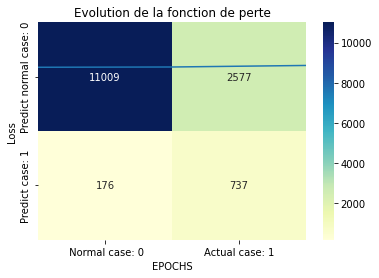


AUC :  0.9146148010207601
Sensibilité :  0.9370675695568969
Spécificité :  0.5805038335158818
Précision :  0.9707945706878145
Error rate :  0.0853851989792399
F mesure :  0.9536329588014981



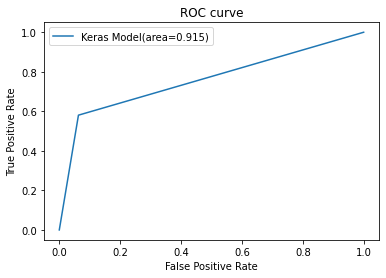






NORMAL   big   100  


Temps pour 1 epoch :  1.46m
Estimation du temps de traitement : 145.66m

Epoch 001:| Loss: 0.08572 | Acc : 0.961
Epoch 002:| Loss: 0.08735 | Acc : 0.961
Epoch 003:| Loss: 0.10286 | Acc : 0.953
Epoch 004:| Loss: 0.08544 | Acc : 0.959
Epoch 005:| Loss: 0.08237 | Acc : 0.965
Epoch 006:| Loss: 0.12933 | Acc : 0.944
Epoch 007:| Loss: 0.08112 | Acc : 0.962
Epoch 008:| Loss: 0.08450 | Acc : 0.959
Epoch 009:| Loss: 0.07865 | Acc : 0.966
Epoch 010:| Loss: 0.07000 | Acc : 0.969
Epoch 011:| Loss: 0.08402 | Acc : 0.962
Epoch 012:| Loss: 0.07372 | Acc : 0.968
Epoch 013:| Loss: 0.05856 | Acc : 0.973
Epoch 014:| Loss: 0.08798 | Acc : 0.959
Epoch 015:| Loss: 0.06275 | Acc : 0.972
Epoch 016:| Loss: 0.06110 | Acc : 0.973
Epoch 017:| Loss: 0.05752 | Acc : 0.974
Epoch 018:| Loss: 0.05701 | Acc : 0.974
Epoch 019:| Loss: 0.05440 | Acc : 0.975
Epoch 020:| Loss: 0.05158 | Acc : 0.977
Epoch 021:| Loss: 0.05710 | Acc : 0.975
Epoch 022:| Loss: 0.05212 | Acc : 0.976
Epoch 023:| Loss: 0

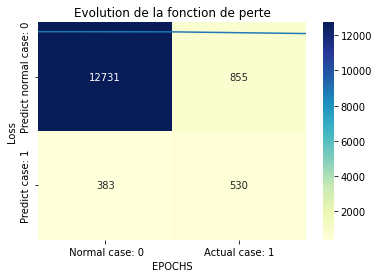


AUC :  0.9217187392233948
Sensibilité :  0.9555424701899013
Spécificité :  0.4184008762322015
Précision :  0.9607045067712573
Error rate :  0.07828126077660524
F mesure :  0.9581165356655227



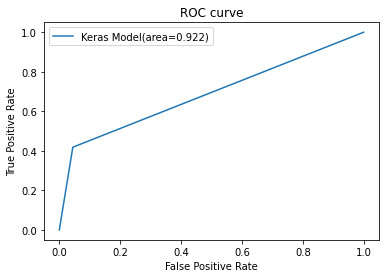

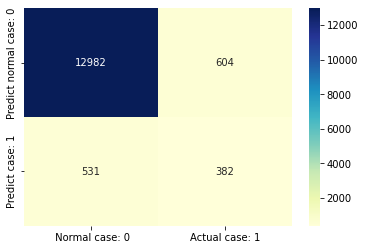

In [ ]:
EPOCH_LIST = [1, 5, 50, 100]
MODEL_LIST = ["simple", "big"]
BASE = ["NORMAL"]

BATCH_SIZE = 1024
LEARNING_RATE = 0.01
MOMENTUM = 0.9
OUTPUT_SIZE = 1

result_tab = []

for element in BASE :
  
  
  train_data = TrainData(torch.FloatTensor(x_train), torch.FloatTensor(y_train))
  test_data = TestData(torch.FloatTensor(x_test), torch.FloatTensor(y_test))
  INPUT_SIZE = 131
  
  ## mise en place d'un WeightedRandomSampler qui permet de garder la distribution dans chaque batchs
  class_count = np.array([np.sum(y_train == 0),np.sum(y_train == 1)])
  weight = 1./class_count
  samples_weight = np.array([weight[t] for t in y_train])
  samples_weight = torch.from_numpy(samples_weight)
  sampler = torch.utils.data.sampler.WeightedRandomSampler(samples_weight, len(samples_weight))

  train_loader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, sampler = sampler)
  test_loader = DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle = False)




  for element_bis in MODEL_LIST :
    if(element_bis == "simple"):
      model = MLP_simple(INPUT_SIZE, OUTPUT_SIZE)
    elif(element_bis == "big"):
      model = MLP_big(INPUT_SIZE, OUTPUT_SIZE)
    else : 
      print("prblm model")
      pass
    #print(model)
    
    for element_ter in EPOCH_LIST :

      print(element, " " , element_bis, " ", element_ter, " ")
      print("")

      start_time_exec = time.time()

      tab = []
      tab.append(element)
      tab.append(INPUT_SIZE)
      tab.append(OUTPUT_SIZE)
      tab.append(element_bis)
      

      EPOCHS = element_ter
      tab.append(EPOCHS)

      criterion = nn.BCELoss()
      optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum = MOMENTUM)
      
      tab.append("BCELoss")
      tab.append("SGD")


      losses = train_model(EPOCHS, model, train_loader, x_train, y_train)

      print("")
      plt.plot(losses)
      plt.title("Evolution de la fonction de perte")
      plt.xlabel("EPOCHS")
      plt.ylabel("Loss")
      plt.show()
      print("")
      
      pred, actuals = eval_model(model, test_loader)

      tab = metric(pred, actuals, tab)
      
      temps_exec = round((time.time() - start_time_exec),2)
      tab.append(temps_exec)

      result_tab.append(tab)
      print("")
      print("")
      print("")
      print("")
      print("")

▶ Export des résultats 

In [ ]:
result = pd.DataFrame(result_tab, columns=["DataSet", "Input Size", "Output Size", "Model", "Nbr EPOCHS", "Criterion", "Optimizer", "True 0", "True 1", "False 0", "False 1", "AUC", "Sensitivity", "Specificity", "Precision", "Error rate", "F_mesure", "tps exec"])
result
file_name = "result_mlp_normal.csv"
result.to_csv(file_name, index=False, sep = ';')
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NORMAL SYMBO   simple   1  


Temps pour 1 epoch :  0.04m
Estimation du temps de traitement : 0.04m

Epoch 001:| Loss: 0.51145 | Acc : 0.658



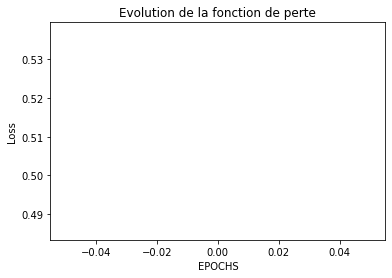


AUC :  0.7375681081453893
Sensibilité :  0.7286176946857059
Spécificité :  0.8707557502738226
Précision :  0.988220025955875
Error rate :  0.2624318918546107
F mesure :  0.8387916790238529



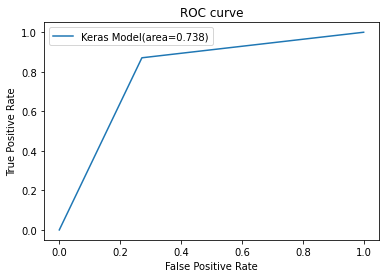






NORMAL SYMBO   simple   5  


Temps pour 1 epoch :  0.04m
Estimation du temps de traitement : 0.2m

Epoch 001:| Loss: 0.44486 | Acc : 0.760
Epoch 002:| Loss: 0.43123 | Acc : 0.787
Epoch 003:| Loss: 0.42584 | Acc : 0.800
Epoch 004:| Loss: 0.42365 | Acc : 0.807
Epoch 005:| Loss: 0.42389 | Acc : 0.811



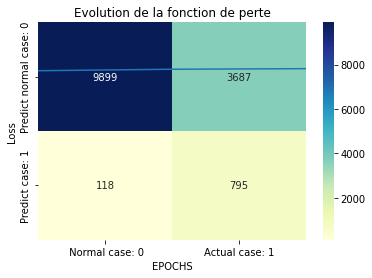


AUC :  0.8089523415407959
Sensibilité :  0.8082585013984984
Spécificité :  0.8192771084337349
Précision :  0.9851964830432443
Error rate :  0.19104765845920413
F mesure :  0.8879993530648553



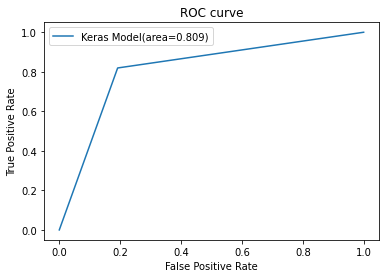






NORMAL SYMBO   simple   50  


Temps pour 1 epoch :  0.04m
Estimation du temps de traitement : 1.97m

Epoch 001:| Loss: 0.41982 | Acc : 0.812
Epoch 002:| Loss: 0.42365 | Acc : 0.814
Epoch 003:| Loss: 0.42136 | Acc : 0.814
Epoch 004:| Loss: 0.42268 | Acc : 0.813
Epoch 005:| Loss: 0.42117 | Acc : 0.815
Epoch 006:| Loss: 0.41957 | Acc : 0.815
Epoch 007:| Loss: 0.42306 | Acc : 0.817
Epoch 008:| Loss: 0.41903 | Acc : 0.816
Epoch 009:| Loss: 0.42363 | Acc : 0.816
Epoch 010:| Loss: 0.42041 | Acc : 0.816
Epoch 011:| Loss: 0.41877 | Acc : 0.814
Epoch 012:| Loss: 0.41990 | Acc : 0.816
Epoch 013:| Loss: 0.42081 | Acc : 0.815
Epoch 014:| Loss: 0.41580 | Acc : 0.816
Epoch 015:| Loss: 0.42268 | Acc : 0.816
Epoch 016:| Loss: 0.41889 | Acc : 0.817
Epoch 017:| Loss: 0.42158 | Acc : 0.817
Epoch 018:| Loss: 0.42179 | Acc : 0.816
Epoch 019:| Loss: 0.41890 | Acc : 0.814
Epoch 020:| Loss: 0.41838 | Acc : 0.813
Epoch 021:| Loss: 0.42582 | Acc : 0.816
Epoch 022:| Loss: 0.42077 | Acc : 0.817
Epoch 023:| L

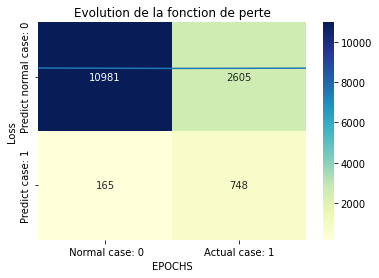


AUC :  0.8090902820884199
Sensibilité :  0.8081112910348889
Spécificité :  0.823658269441402
Précision :  0.9855475763016158
Error rate :  0.19090971791158007
F mesure :  0.8880530615546389



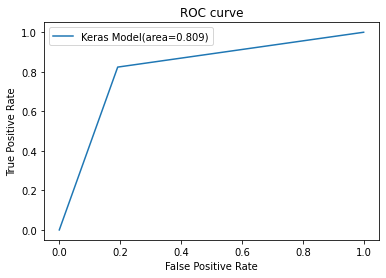






NORMAL SYMBO   simple   100  


Temps pour 1 epoch :  0.04m
Estimation du temps de traitement : 3.96m

Epoch 001:| Loss: 0.42442 | Acc : 0.817
Epoch 002:| Loss: 0.41967 | Acc : 0.813
Epoch 003:| Loss: 0.42096 | Acc : 0.817
Epoch 004:| Loss: 0.42001 | Acc : 0.815
Epoch 005:| Loss: 0.42052 | Acc : 0.816
Epoch 006:| Loss: 0.42119 | Acc : 0.815
Epoch 007:| Loss: 0.41821 | Acc : 0.816
Epoch 008:| Loss: 0.42106 | Acc : 0.814
Epoch 009:| Loss: 0.42133 | Acc : 0.815
Epoch 010:| Loss: 0.42250 | Acc : 0.815
Epoch 011:| Loss: 0.41890 | Acc : 0.816
Epoch 012:| Loss: 0.42592 | Acc : 0.815
Epoch 013:| Loss: 0.42166 | Acc : 0.816
Epoch 014:| Loss: 0.42176 | Acc : 0.815
Epoch 015:| Loss: 0.41722 | Acc : 0.813
Epoch 016:| Loss: 0.42088 | Acc : 0.815
Epoch 017:| Loss: 0.42171 | Acc : 0.814
Epoch 018:| Loss: 0.41902 | Acc : 0.816
Epoch 019:| Loss: 0.41919 | Acc : 0.814
Epoch 020:| Loss: 0.41792 | Acc : 0.814
Epoch 021:| Loss: 0.42258 | Acc : 0.814
Epoch 022:| Loss: 0.41984 | Acc : 0.814
Epoch 023:| 

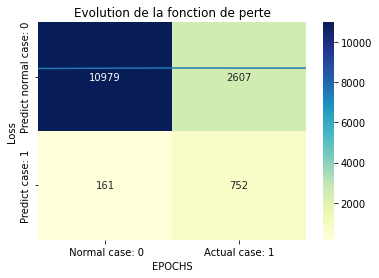


AUC :  0.8175046554934823
Sensibilité :  0.8174591491240983
Spécificité :  0.8181818181818182
Précision :  0.9852732434350603
Error rate :  0.18249534450651772
F mesure :  0.893555394641564



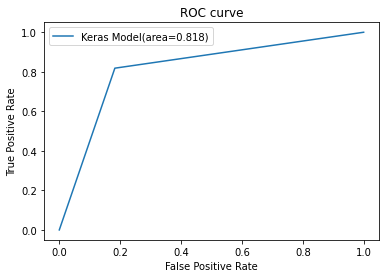






NORMAL SYMBO   big   1  


Temps pour 1 epoch :  1.65m
Estimation du temps de traitement : 1.65m

Epoch 001:| Loss: 0.68520 | Acc : 0.774



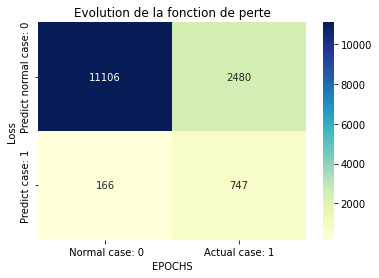


AUC :  0.5988688875094834
Sensibilité :  0.5808920948034741
Spécificité :  0.8663745892661555
Précision :  0.9847766408784627
Error rate :  0.4011311124905166
F mesure :  0.7307407407407408



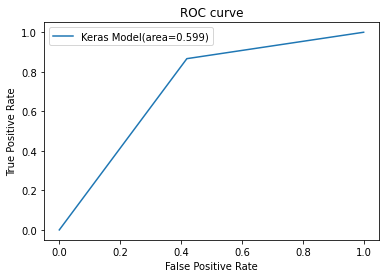






NORMAL SYMBO   big   5  


Temps pour 1 epoch :  1.66m
Estimation du temps de traitement : 8.28m

Epoch 001:| Loss: 0.61401 | Acc : 0.638
Epoch 002:| Loss: 0.46538 | Acc : 0.817
Epoch 003:| Loss: 0.42369 | Acc : 0.842
Epoch 004:| Loss: 0.40476 | Acc : 0.843
Epoch 005:| Loss: 0.38945 | Acc : 0.848



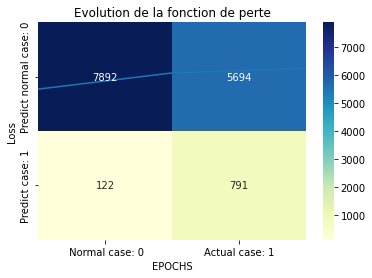


AUC :  0.845437616387337
Sensibilité :  0.8480789047548948
Spécificité :  0.8061336254107339
Précision :  0.9848705017522865
Error rate :  0.15456238361266295
F mesure :  0.9113703776942851



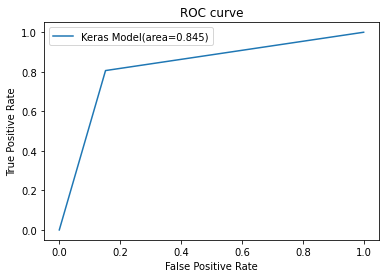






NORMAL SYMBO   big   50  


Temps pour 1 epoch :  1.64m
Estimation du temps de traitement : 81.94m

Epoch 001:| Loss: 0.37304 | Acc : 0.850
Epoch 002:| Loss: 0.36342 | Acc : 0.853
Epoch 003:| Loss: 0.34302 | Acc : 0.861
Epoch 004:| Loss: 0.31892 | Acc : 0.868
Epoch 005:| Loss: 0.30003 | Acc : 0.876
Epoch 006:| Loss: 0.27286 | Acc : 0.888
Epoch 007:| Loss: 0.23941 | Acc : 0.898
Epoch 008:| Loss: 0.20422 | Acc : 0.909
Epoch 009:| Loss: 0.18418 | Acc : 0.920
Epoch 010:| Loss: 0.15968 | Acc : 0.929
Epoch 011:| Loss: 0.14197 | Acc : 0.935
Epoch 012:| Loss: 0.13241 | Acc : 0.944
Epoch 013:| Loss: 0.12162 | Acc : 0.946
Epoch 014:| Loss: 0.12218 | Acc : 0.948
Epoch 015:| Loss: 0.10204 | Acc : 0.957
Epoch 016:| Loss: 0.09870 | Acc : 0.959
Epoch 017:| Loss: 0.10019 | Acc : 0.962
Epoch 018:| Loss: 0.09147 | Acc : 0.965
Epoch 019:| Loss: 0.14283 | Acc : 0.947
Epoch 020:| Loss: 0.12117 | Acc : 0.955
Epoch 021:| Loss: 0.08050 | Acc : 0.970
Epoch 022:| Loss: 0.06402 | Acc : 0.974
Epoch 023:| Los

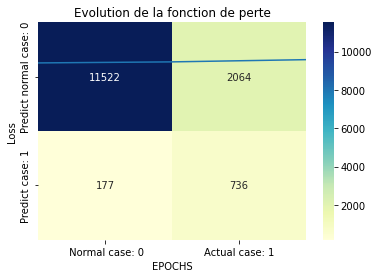


AUC :  0.9196496310090351
Sensibilité :  0.9510525540998086
Spécificité :  0.452354874041621
Précision :  0.962744951940988
Error rate :  0.08035036899096493
F mesure :  0.9568630355093124



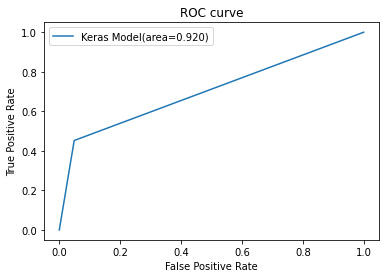






NORMAL SYMBO   big   100  


Temps pour 1 epoch :  1.63m
Estimation du temps de traitement : 162.83m

Epoch 001:| Loss: 0.02538 | Acc : 0.994
Epoch 002:| Loss: 0.03082 | Acc : 0.994
Epoch 003:| Loss: 0.04350 | Acc : 0.992
Epoch 004:| Loss: 0.04105 | Acc : 0.994
Epoch 005:| Loss: 0.03104 | Acc : 0.992
Epoch 006:| Loss: 0.03778 | Acc : 0.989
Epoch 007:| Loss: 0.05508 | Acc : 0.987
Epoch 008:| Loss: 0.03113 | Acc : 0.992
Epoch 009:| Loss: 0.03113 | Acc : 0.995
Epoch 010:| Loss: 0.02887 | Acc : 0.996
Epoch 011:| Loss: 0.01840 | Acc : 0.997
Epoch 012:| Loss: 0.04131 | Acc : 0.995
Epoch 013:| Loss: 0.02227 | Acc : 0.996
Epoch 014:| Loss: 0.04582 | Acc : 0.997
Epoch 015:| Loss: 0.02037 | Acc : 0.997
Epoch 016:| Loss: 0.03533 | Acc : 0.997
Epoch 017:| Loss: 0.02624 | Acc : 0.996
Epoch 018:| Loss: 0.02918 | Acc : 0.997
Epoch 019:| Loss: 0.03032 | Acc : 0.996
Epoch 020:| Loss: 0.02637 | Acc : 0.996
Epoch 021:| Loss: 0.03439 | Acc : 0.996
Epoch 022:| Loss: 0.04622 | Acc : 0.997
Epoch 023:| L

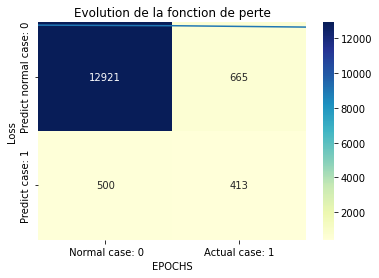


AUC :  0.9297882612593972
Sensibilité :  0.9682025614603268
Spécificité :  0.35815991237677985
Précision :  0.9573508005822416
Error rate :  0.07021173874060282
F mesure :  0.9627461026128962



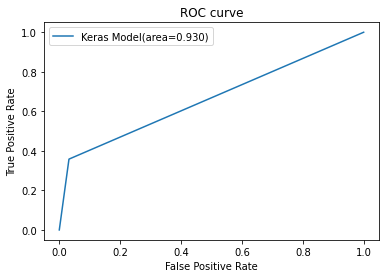

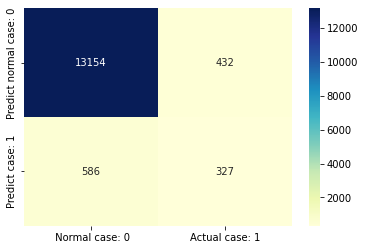

In [ ]:
EPOCH_LIST = [1, 5, 50, 100]
MODEL_LIST = ["simple", "big"]
BASE = ["NORMAL SYMBO"]

BATCH_SIZE = 1024
LEARNING_RATE = 0.01
MOMENTUM = 0.9
OUTPUT_SIZE = 1

result_tab = []

for element in BASE :
  
  
  train_data = TrainData(torch.FloatTensor(x_train_symbo), torch.FloatTensor(y_train_symbo))
  test_data = TestData(torch.FloatTensor(x_test_symbo), torch.FloatTensor(y_test_symbo))
  INPUT_SIZE = 366


  ## mise en place d'un WeightedRandomSampler qui permet de garder la distribution dans chaque batchs
  class_count = np.array([np.sum(y_train_symbo == 0),np.sum(y_train_symbo == 1)])
  weight = 1./class_count
  samples_weight = np.array([weight[t] for t in y_train_symbo])
  samples_weight = torch.from_numpy(samples_weight)
  sampler = torch.utils.data.sampler.WeightedRandomSampler(samples_weight, len(samples_weight))

  train_loader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, sampler = sampler)
  test_loader = DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle = False)


  for element_bis in MODEL_LIST :
    if(element_bis == "simple"):
      model = MLP_simple(INPUT_SIZE, OUTPUT_SIZE)
    elif(element_bis == "big"):
      model = MLP_big(INPUT_SIZE, OUTPUT_SIZE)
    else : 
      print("prblm model")
      pass

    for element_ter in EPOCH_LIST :

      print(element, " " , element_bis, " ", element_ter, " ")
      print("")

      start_time_exec = time.time()

      tab = []
      tab.append(element)
      tab.append(INPUT_SIZE)
      tab.append(OUTPUT_SIZE)
      tab.append(element_bis)
      

      EPOCHS = element_ter
      tab.append(EPOCHS)

      criterion = nn.BCELoss()
      optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum = MOMENTUM)
      
      tab.append("BCELoss")
      tab.append("SGD")

      losses = train_model(EPOCHS, model, train_loader, x_train_symbo, y_train_symbo)

      print("")
      plt.plot(losses)
      plt.title("Evolution de la fonction de perte")
      plt.xlabel("EPOCHS")
      plt.ylabel("Loss")
      plt.show()
      print("")
      
      pred, actuals = eval_model(model, test_loader)

      tab = metric(pred, actuals, tab)
      
      temps_exec = round((time.time() - start_time_exec),2)
      tab.append(temps_exec)

      result_tab.append(tab)
      print("")
      print("")
      print("")
      print("")
      print("")

▶ Export des résultats 

In [ ]:
result = pd.DataFrame(result_tab, columns=["DataSet", "Input Size", "Output Size", "Model", "Nbr EPOCHS", "Criterion", "Optimizer", "True 0", "True 1", "False 0", "False 1", "AUC", "Sensitivity", "Specificity", "Precision", "Error rate", "F_mesure", "tps exec"])
result
file_name = "result_mlp_normal_symbo.csv"
result.to_csv(file_name, index=False, sep = ';')
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ACP   simple   1  


Temps pour 1 epoch :  0.01m
Estimation du temps de traitement : 0.01m

Epoch 001:| Loss: 0.61231 | Acc : 0.692



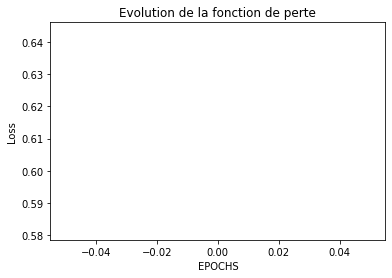


AUC :  0.7208083316090765
Sensibilité :  0.7146327101427941
Spécificité :  0.8127053669222344
Précision :  0.9826923076923076
Error rate :  0.27919166839092346
F mesure :  0.8274950992925936



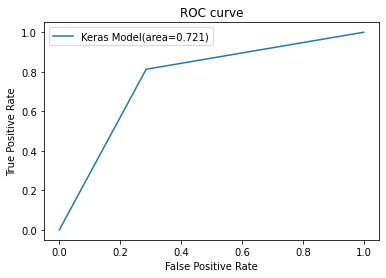






ACP   simple   5  


Temps pour 1 epoch :  0.01m
Estimation du temps de traitement : 0.05m

Epoch 001:| Loss: 0.56617 | Acc : 0.746
Epoch 002:| Loss: 0.55274 | Acc : 0.774
Epoch 003:| Loss: 0.55442 | Acc : 0.782
Epoch 004:| Loss: 0.55345 | Acc : 0.785
Epoch 005:| Loss: 0.55681 | Acc : 0.788



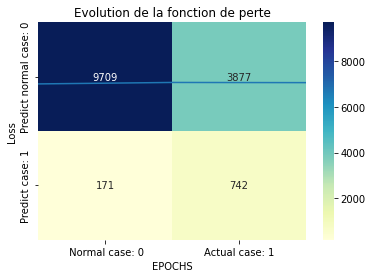


AUC :  0.7913649217187392
Sensibilité :  0.7953775945826587
Spécificité :  0.7316538882803943
Précision :  0.9778300606279975
Error rate :  0.20863507828126082
F mesure :  0.8772171936518246



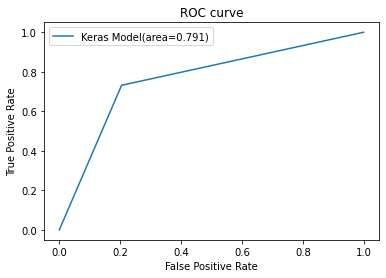






ACP   simple   50  


Temps pour 1 epoch :  0.01m
Estimation du temps de traitement : 0.27m

Epoch 001:| Loss: 0.55583 | Acc : 0.790
Epoch 002:| Loss: 0.55529 | Acc : 0.789
Epoch 003:| Loss: 0.55190 | Acc : 0.789
Epoch 004:| Loss: 0.55794 | Acc : 0.788
Epoch 005:| Loss: 0.55818 | Acc : 0.790
Epoch 006:| Loss: 0.55214 | Acc : 0.793
Epoch 007:| Loss: 0.55748 | Acc : 0.791
Epoch 008:| Loss: 0.55605 | Acc : 0.793
Epoch 009:| Loss: 0.55422 | Acc : 0.791
Epoch 010:| Loss: 0.55817 | Acc : 0.791
Epoch 011:| Loss: 0.55889 | Acc : 0.793
Epoch 012:| Loss: 0.55151 | Acc : 0.791
Epoch 013:| Loss: 0.55331 | Acc : 0.789
Epoch 014:| Loss: 0.55749 | Acc : 0.792
Epoch 015:| Loss: 0.55140 | Acc : 0.789
Epoch 016:| Loss: 0.55347 | Acc : 0.790
Epoch 017:| Loss: 0.55118 | Acc : 0.793
Epoch 018:| Loss: 0.55213 | Acc : 0.789
Epoch 019:| Loss: 0.55532 | Acc : 0.791
Epoch 020:| Loss: 0.55615 | Acc : 0.791
Epoch 021:| Loss: 0.55609 | Acc : 0.793
Epoch 022:| Loss: 0.55361 | Acc : 0.791
Epoch 023:| Loss: 0.55

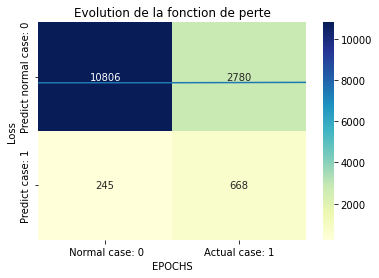


AUC :  0.7970894544451341
Sensibilité :  0.8020020609450905
Spécificité :  0.723986856516977
Précision :  0.9773950484391819
Error rate :  0.20291054555486587
F mesure :  0.8810544190183552



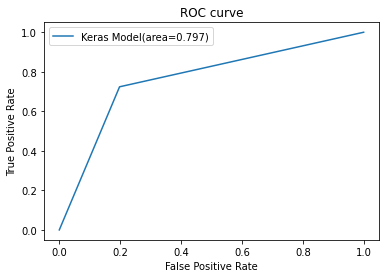






ACP   simple   100  


Temps pour 1 epoch :  0.01m
Estimation du temps de traitement : 0.53m

Epoch 001:| Loss: 0.55275 | Acc : 0.792
Epoch 002:| Loss: 0.55580 | Acc : 0.791
Epoch 003:| Loss: 0.55262 | Acc : 0.788
Epoch 004:| Loss: 0.55189 | Acc : 0.788
Epoch 005:| Loss: 0.55376 | Acc : 0.792
Epoch 006:| Loss: 0.55277 | Acc : 0.790
Epoch 007:| Loss: 0.55255 | Acc : 0.789
Epoch 008:| Loss: 0.55507 | Acc : 0.789
Epoch 009:| Loss: 0.55472 | Acc : 0.789
Epoch 010:| Loss: 0.55355 | Acc : 0.791
Epoch 011:| Loss: 0.55137 | Acc : 0.789
Epoch 012:| Loss: 0.55229 | Acc : 0.790
Epoch 013:| Loss: 0.55172 | Acc : 0.789
Epoch 014:| Loss: 0.55484 | Acc : 0.790
Epoch 015:| Loss: 0.54832 | Acc : 0.790
Epoch 016:| Loss: 0.55692 | Acc : 0.790
Epoch 017:| Loss: 0.55714 | Acc : 0.792
Epoch 018:| Loss: 0.55145 | Acc : 0.791
Epoch 019:| Loss: 0.56214 | Acc : 0.791
Epoch 020:| Loss: 0.55393 | Acc : 0.792
Epoch 021:| Loss: 0.55188 | Acc : 0.791
Epoch 022:| Loss: 0.55752 | Acc : 0.791
Epoch 023:| Loss: 0.5

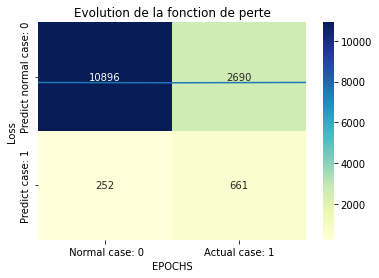


AUC :  0.7929512380164149
Sensibilité :  0.7969233034005594
Spécificité :  0.7338444687842278
Précision :  0.9780487804878049
Error rate :  0.20704876198358513
F mesure :  0.8782446463335496



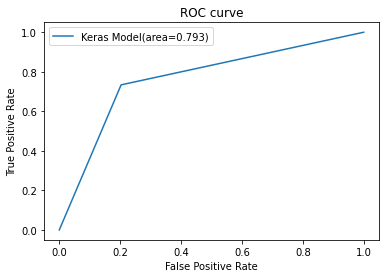






ACP   big   1  


Temps pour 1 epoch :  1.43m
Estimation du temps de traitement : 1.43m

Epoch 001:| Loss: 0.69039 | Acc : 0.272



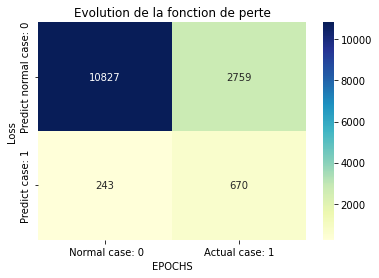


AUC :  0.6228705427960549
Sensibilité :  0.6090092742529074
Spécificité :  0.8291347207009858
Précision :  0.9814946619217082
Error rate :  0.3771294572039451
F mesure :  0.7516351744186046



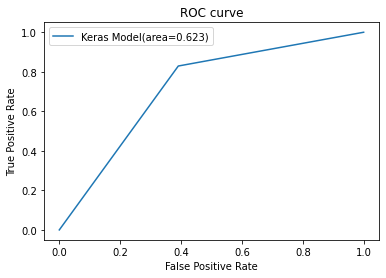






ACP   big   5  


Temps pour 1 epoch :  1.44m
Estimation du temps de traitement : 7.18m

Epoch 001:| Loss: 0.67554 | Acc : 0.719
Epoch 002:| Loss: 0.60090 | Acc : 0.792
Epoch 003:| Loss: 0.52279 | Acc : 0.792
Epoch 004:| Loss: 0.50666 | Acc : 0.796
Epoch 005:| Loss: 0.49642 | Acc : 0.798



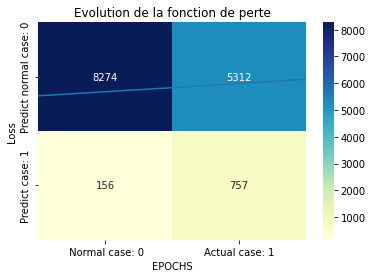


AUC :  0.7918477136354232
Sensibilité :  0.7927278080376858
Spécificité :  0.778751369112815
Précision :  0.9815895005468466
Error rate :  0.20815228636457683
F mesure :  0.8771072562912289



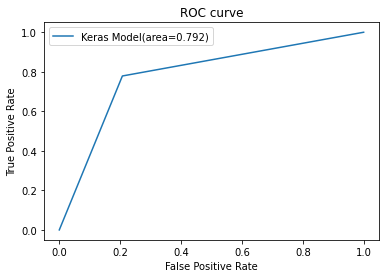






ACP   big   50  


Temps pour 1 epoch :  1.45m
Estimation du temps de traitement : 72.38m

Epoch 001:| Loss: 0.48686 | Acc : 0.799
Epoch 002:| Loss: 0.47715 | Acc : 0.806
Epoch 003:| Loss: 0.47430 | Acc : 0.804
Epoch 004:| Loss: 0.46927 | Acc : 0.804
Epoch 005:| Loss: 0.46530 | Acc : 0.806
Epoch 006:| Loss: 0.46087 | Acc : 0.808
Epoch 007:| Loss: 0.45402 | Acc : 0.811
Epoch 008:| Loss: 0.45020 | Acc : 0.811
Epoch 009:| Loss: 0.44803 | Acc : 0.808
Epoch 010:| Loss: 0.44333 | Acc : 0.810
Epoch 011:| Loss: 0.44337 | Acc : 0.810
Epoch 012:| Loss: 0.43645 | Acc : 0.814
Epoch 013:| Loss: 0.43419 | Acc : 0.817
Epoch 014:| Loss: 0.43339 | Acc : 0.810
Epoch 015:| Loss: 0.42482 | Acc : 0.815
Epoch 016:| Loss: 0.41769 | Acc : 0.813
Epoch 017:| Loss: 0.41826 | Acc : 0.817
Epoch 018:| Loss: 0.41250 | Acc : 0.819
Epoch 019:| Loss: 0.40915 | Acc : 0.820
Epoch 020:| Loss: 0.40101 | Acc : 0.825
Epoch 021:| Loss: 0.40217 | Acc : 0.823
Epoch 022:| Loss: 0.39662 | Acc : 0.823
Epoch 023:| Loss: 0.3893

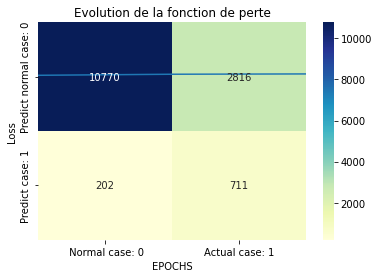


AUC :  0.8110904200289675
Sensibilité :  0.8163550713970263
Spécificité :  0.732749178532311
Précision :  0.9784737538597265
Error rate :  0.18890957997103253
F mesure :  0.8900926929095943



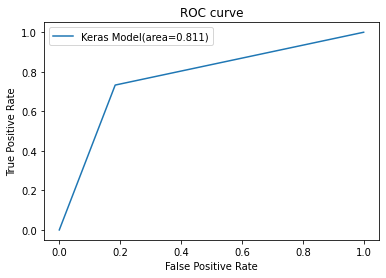






ACP   big   100  


Temps pour 1 epoch :  1.44m
Estimation du temps de traitement : 143.81m

Epoch 001:| Loss: 0.24886 | Acc : 0.877
Epoch 002:| Loss: 0.26104 | Acc : 0.874
Epoch 003:| Loss: 0.23592 | Acc : 0.885
Epoch 004:| Loss: 0.23659 | Acc : 0.884
Epoch 005:| Loss: 0.24273 | Acc : 0.882
Epoch 006:| Loss: 0.22346 | Acc : 0.890
Epoch 007:| Loss: 0.23024 | Acc : 0.890
Epoch 008:| Loss: 0.23016 | Acc : 0.884
Epoch 009:| Loss: 0.21468 | Acc : 0.895
Epoch 010:| Loss: 0.22350 | Acc : 0.889
Epoch 011:| Loss: 0.20505 | Acc : 0.898
Epoch 012:| Loss: 0.20192 | Acc : 0.899
Epoch 013:| Loss: 0.20532 | Acc : 0.900
Epoch 014:| Loss: 0.21143 | Acc : 0.895
Epoch 015:| Loss: 0.20347 | Acc : 0.900
Epoch 016:| Loss: 0.19583 | Acc : 0.900
Epoch 017:| Loss: 0.19293 | Acc : 0.904
Epoch 018:| Loss: 0.20416 | Acc : 0.901
Epoch 019:| Loss: 0.18310 | Acc : 0.910
Epoch 020:| Loss: 0.20397 | Acc : 0.898
Epoch 021:| Loss: 0.18995 | Acc : 0.906
Epoch 022:| Loss: 0.17465 | Acc : 0.913
Epoch 023:| Loss: 0.17

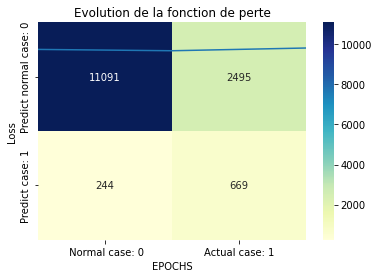


AUC :  0.9037864680322781
Sensibilité :  0.9347122037391432
Spécificité :  0.44359255202628695
Précision :  0.9615355493299008
Error rate :  0.09621353196772187
F mesure :  0.9479341619079611



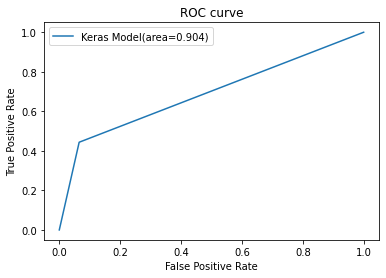

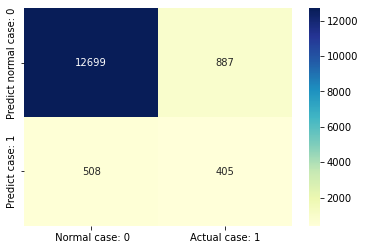

In [ ]:
EPOCH_LIST = [1, 5, 50, 100]
MODEL_LIST = ["simple", "big"]
BASE = ["ACP"]

BATCH_SIZE = 1024
LEARNING_RATE = 0.01
MOMENTUM = 0.9
OUTPUT_SIZE = 1

result_tab = []

for element in BASE :
  
  if(element == "ACP"):
    train_data = TrainData(torch.FloatTensor(x_train_ACP), torch.FloatTensor(y_train_ACP))
    test_data = TestData(torch.FloatTensor(x_test_ACP), torch.FloatTensor(y_test_ACP))
    INPUT_SIZE = 23
  else :
    print("Probleme base")
    pass

  ## mise en place d'un WeightedRandomSampler qui permet de garder la distribution dans chaque batchs
  class_count = np.array([np.sum(y_train == 0),np.sum(y_train == 1)])
  weight = 1./class_count
  samples_weight = np.array([weight[t] for t in y_train])
  samples_weight = torch.from_numpy(samples_weight)
  sampler = torch.utils.data.sampler.WeightedRandomSampler(samples_weight, len(samples_weight))

  train_loader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, sampler = sampler)
  test_loader = DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle = False)




  for element_bis in MODEL_LIST :
    if(element_bis == "simple"):
      model = MLP_simple(INPUT_SIZE, OUTPUT_SIZE)
    elif(element_bis == "big"):
      model = MLP_big(INPUT_SIZE, OUTPUT_SIZE)
    else : 
      print("prblm model")
      pass

    for element_ter in EPOCH_LIST :

      print(element, " " , element_bis, " ", element_ter, " ")
      print("")

      start_time_exec = time.time()

      tab = []
      tab.append(element)
      tab.append(INPUT_SIZE)
      tab.append(OUTPUT_SIZE)
      tab.append(element_bis)
      

      EPOCHS = element_ter
      tab.append(EPOCHS)

      criterion = nn.BCELoss()
      optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum = MOMENTUM)
      
      tab.append("BCELoss")
      tab.append("SGD")

      losses = train_model(EPOCHS, model, train_loader, x_train_ACP, y_train_ACP)

      print("")
      plt.plot(losses)
      plt.title("Evolution de la fonction de perte")
      plt.xlabel("EPOCHS")
      plt.ylabel("Loss")
      plt.show()
      print("")
      
      pred, actuals = eval_model(model, test_loader)

      tab = metric(pred, actuals, tab)
      
      temps_exec = round((time.time() - start_time_exec),2)
      tab.append(temps_exec)

      result_tab.append(tab)
      print("")
      print("")
      print("")
      print("")
      print("")

▶ Export des résultats 

In [ ]:
result = pd.DataFrame(result_tab, columns=["DataSet", "Input Size", "Output Size", "Model", "Nbr EPOCHS", "Criterion", "Optimizer", "True 0", "True 1", "False 0", "False 1", "AUC", "Sensitivity", "Specificity", "Precision", "Error rate", "F_mesure", "tps exec"])
result
file_name = "result_mlp_acp.csv"
result.to_csv(file_name, index=False, sep = ';')
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ACP SYMBO   simple   1  


Temps pour 1 epoch :  0.01m
Estimation du temps de traitement : 0.01m

Epoch 001:| Loss: 0.71180 | Acc : 0.103



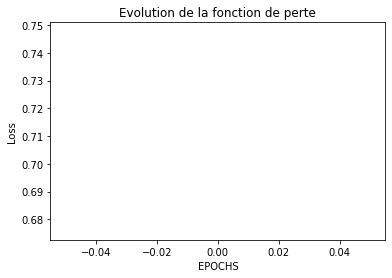


AUC :  0.12462928477826057
Sensibilité :  0.06874723980568231
Spécificité :  0.9561883899233297
Précision :  0.9589322381930184
Error rate :  0.8753707152217394
F mesure :  0.1282967032967033



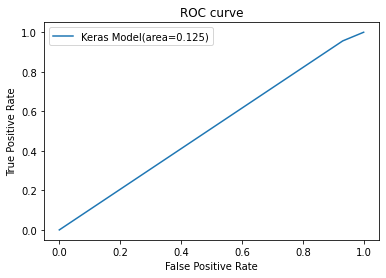






ACP SYMBO   simple   5  


Temps pour 1 epoch :  0.01m
Estimation du temps de traitement : 0.05m

Epoch 001:| Loss: 0.69481 | Acc : 0.107
Epoch 002:| Loss: 0.69156 | Acc : 0.103
Epoch 003:| Loss: 0.69251 | Acc : 0.104
Epoch 004:| Loss: 0.68679 | Acc : 0.102
Epoch 005:| Loss: 0.68640 | Acc : 0.111



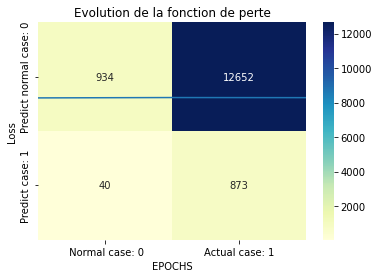


AUC :  0.11587006000413821
Sensibilité :  0.05785367289857206
Spécificité :  0.9791894852135816
Précision :  0.9763975155279503
Error rate :  0.8841299399958618
F mesure :  0.10923493850323118



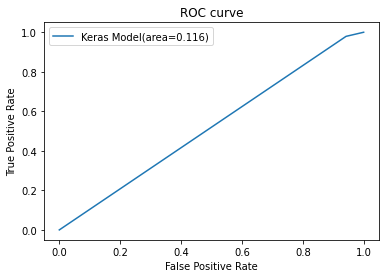






ACP SYMBO   simple   50  


Temps pour 1 epoch :  0.01m
Estimation du temps de traitement : 0.52m

Epoch 001:| Loss: 0.68700 | Acc : 0.105
Epoch 002:| Loss: 0.68775 | Acc : 0.104
Epoch 003:| Loss: 0.68726 | Acc : 0.104
Epoch 004:| Loss: 0.68713 | Acc : 0.104
Epoch 005:| Loss: 0.68718 | Acc : 0.103
Epoch 006:| Loss: 0.68760 | Acc : 0.104
Epoch 007:| Loss: 0.68686 | Acc : 0.108
Epoch 008:| Loss: 0.68718 | Acc : 0.104
Epoch 009:| Loss: 0.68706 | Acc : 0.104
Epoch 010:| Loss: 0.68725 | Acc : 0.104
Epoch 011:| Loss: 0.68874 | Acc : 0.103
Epoch 012:| Loss: 0.68876 | Acc : 0.104
Epoch 013:| Loss: 0.68688 | Acc : 0.104
Epoch 014:| Loss: 0.69062 | Acc : 0.104
Epoch 015:| Loss: 0.68691 | Acc : 0.107
Epoch 016:| Loss: 0.68887 | Acc : 0.104
Epoch 017:| Loss: 0.68831 | Acc : 0.105
Epoch 018:| Loss: 0.68710 | Acc : 0.104
Epoch 019:| Loss: 0.68740 | Acc : 0.104
Epoch 020:| Loss: 0.68711 | Acc : 0.103
Epoch 021:| Loss: 0.68712 | Acc : 0.104
Epoch 022:| Loss: 0.68707 | Acc : 0.103
Epoch 023:| Loss

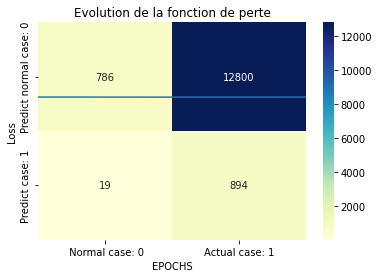


AUC :  0.11821504931374578
Sensibilité :  0.060356249079935226
Spécificité :  0.9791894852135816
Précision :  0.9773539928486293
Error rate :  0.8817849506862542
F mesure :  0.11369150779896013



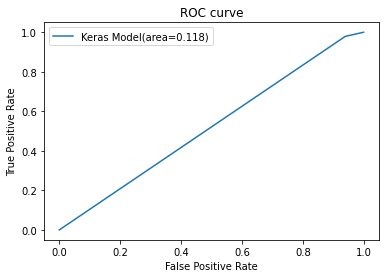






ACP SYMBO   simple   100  


Temps pour 1 epoch :  0.01m
Estimation du temps de traitement : 0.88m

Epoch 001:| Loss: 0.68640 | Acc : 0.104
Epoch 002:| Loss: 0.69075 | Acc : 0.104
Epoch 003:| Loss: 0.68853 | Acc : 0.102
Epoch 004:| Loss: 0.68710 | Acc : 0.103
Epoch 005:| Loss: 0.68969 | Acc : 0.104
Epoch 006:| Loss: 0.68841 | Acc : 0.104
Epoch 007:| Loss: 0.69046 | Acc : 0.104
Epoch 008:| Loss: 0.68857 | Acc : 0.104
Epoch 009:| Loss: 0.68885 | Acc : 0.104
Epoch 010:| Loss: 0.68899 | Acc : 0.104
Epoch 011:| Loss: 0.68714 | Acc : 0.107
Epoch 012:| Loss: 0.68896 | Acc : 0.104
Epoch 013:| Loss: 0.68646 | Acc : 0.104
Epoch 014:| Loss: 0.69241 | Acc : 0.103
Epoch 015:| Loss: 0.68711 | Acc : 0.104
Epoch 016:| Loss: 0.68926 | Acc : 0.103
Epoch 017:| Loss: 0.68659 | Acc : 0.104
Epoch 018:| Loss: 0.68815 | Acc : 0.104
Epoch 019:| Loss: 0.68700 | Acc : 0.104
Epoch 020:| Loss: 0.68709 | Acc : 0.104
Epoch 021:| Loss: 0.68722 | Acc : 0.104
Epoch 022:| Loss: 0.68642 | Acc : 0.104
Epoch 023:| Los

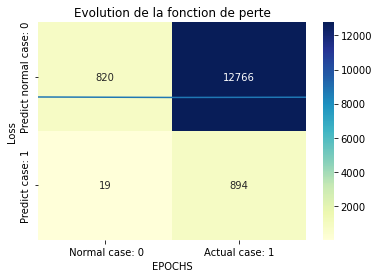


AUC :  0.11800813849230982
Sensibilité :  0.06020903871632563
Spécificité :  0.9780941949616648
Précision :  0.9761336515513126
Error rate :  0.8819918615076902
F mesure :  0.11342207432057681



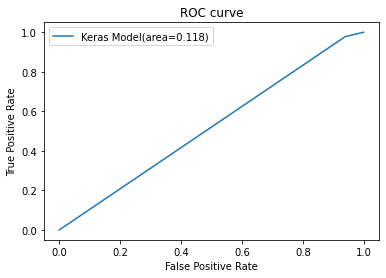






ACP SYMBO   big   1  


Temps pour 1 epoch :  1.37m
Estimation du temps de traitement : 1.37m

Epoch 001:| Loss: 0.69373 | Acc : 0.937



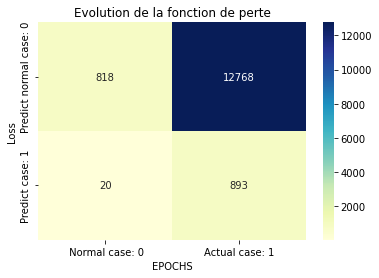


AUC :  0.9367542589144079
Sensibilité :  0.9997055792727808
Spécificité :  0.0
Précision :  0.9370127630217316
Error rate :  0.06324574108559211
F mesure :  0.9673444677896087



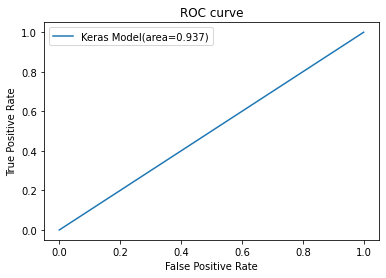






ACP SYMBO   big   5  


Temps pour 1 epoch :  1.35m
Estimation du temps de traitement : 6.76m

Epoch 001:| Loss: 0.69268 | Acc : 0.912
Epoch 002:| Loss: 0.69230 | Acc : 0.864
Epoch 003:| Loss: 0.69184 | Acc : 0.585
Epoch 004:| Loss: 0.69195 | Acc : 0.212
Epoch 005:| Loss: 0.69142 | Acc : 0.386



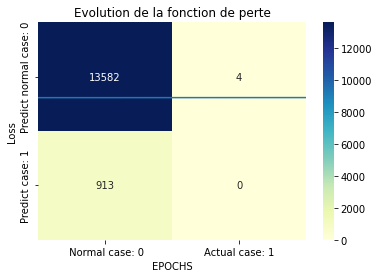


AUC :  0.13228498517139112
Sensibilité :  0.07890475489474459
Spécificité :  0.9266155531215772
Précision :  0.9411764705882353
Error rate :  0.8677150148286089
F mesure :  0.14560271646859083



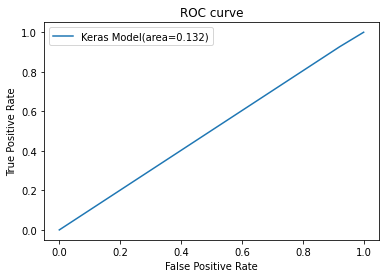






ACP SYMBO   big   50  


Temps pour 1 epoch :  1.37m
Estimation du temps de traitement : 68.52m

Epoch 001:| Loss: 0.69113 | Acc : 0.208
Epoch 002:| Loss: 0.69116 | Acc : 0.117
Epoch 003:| Loss: 0.69024 | Acc : 0.583
Epoch 004:| Loss: 0.69052 | Acc : 0.118
Epoch 005:| Loss: 0.68977 | Acc : 0.117
Epoch 006:| Loss: 0.68936 | Acc : 0.124
Epoch 007:| Loss: 0.68911 | Acc : 0.134
Epoch 008:| Loss: 0.68873 | Acc : 0.122
Epoch 009:| Loss: 0.68820 | Acc : 0.116
Epoch 010:| Loss: 0.68754 | Acc : 0.118
Epoch 011:| Loss: 0.68794 | Acc : 0.150
Epoch 012:| Loss: 0.68772 | Acc : 0.117
Epoch 013:| Loss: 0.68698 | Acc : 0.144
Epoch 014:| Loss: 0.68703 | Acc : 0.110
Epoch 015:| Loss: 0.68738 | Acc : 0.163
Epoch 016:| Loss: 0.68694 | Acc : 0.114
Epoch 017:| Loss: 0.68665 | Acc : 0.117
Epoch 018:| Loss: 0.68706 | Acc : 0.154
Epoch 019:| Loss: 0.68662 | Acc : 0.179
Epoch 020:| Loss: 0.68646 | Acc : 0.112
Epoch 021:| Loss: 0.68731 | Acc : 0.114
Epoch 022:| Loss: 0.68596 | Acc : 0.107
Epoch 023:| Loss: 

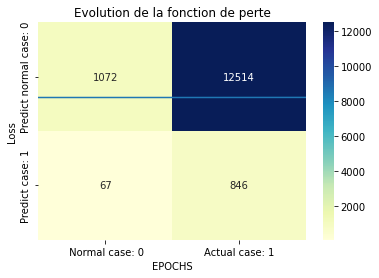


AUC :  0.12187047382578109
Sensibilité :  0.06609745326070955
Spécificité :  0.9518072289156626
Précision :  0.9532908704883227
Error rate :  0.8781295261742189
F mesure :  0.12362334801762113



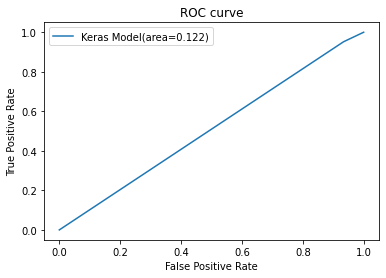






ACP SYMBO   big   100  


Temps pour 1 epoch :  1.37m
Estimation du temps de traitement : 137.07m

Epoch 001:| Loss: 0.68621 | Acc : 0.104
Epoch 002:| Loss: 0.68589 | Acc : 0.105
Epoch 003:| Loss: 0.68592 | Acc : 0.109
Epoch 004:| Loss: 0.68676 | Acc : 0.124
Epoch 005:| Loss: 0.68598 | Acc : 0.105
Epoch 006:| Loss: 0.68556 | Acc : 0.103
Epoch 007:| Loss: 0.68600 | Acc : 0.105
Epoch 008:| Loss: 0.68566 | Acc : 0.104
Epoch 009:| Loss: 0.68521 | Acc : 0.105
Epoch 010:| Loss: 0.68611 | Acc : 0.108
Epoch 011:| Loss: 0.68558 | Acc : 0.134
Epoch 012:| Loss: 0.68557 | Acc : 0.106
Epoch 013:| Loss: 0.68596 | Acc : 0.105
Epoch 014:| Loss: 0.68614 | Acc : 0.103
Epoch 015:| Loss: 0.68613 | Acc : 0.109
Epoch 016:| Loss: 0.68640 | Acc : 0.106
Epoch 017:| Loss: 0.68578 | Acc : 0.149
Epoch 018:| Loss: 0.68507 | Acc : 0.111
Epoch 019:| Loss: 0.68520 | Acc : 0.106
Epoch 020:| Loss: 0.68652 | Acc : 0.106
Epoch 021:| Loss: 0.68667 | Acc : 0.105
Epoch 022:| Loss: 0.68646 | Acc : 0.111
Epoch 023:| Loss

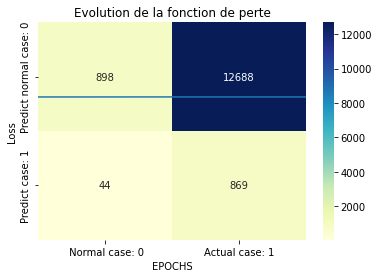


AUC :  0.12187047382578109
Sensibilité :  0.06609745326070955
Spécificité :  0.9518072289156626
Précision :  0.9532908704883227
Error rate :  0.8781295261742189
F mesure :  0.12362334801762113



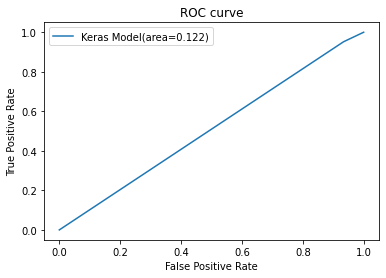

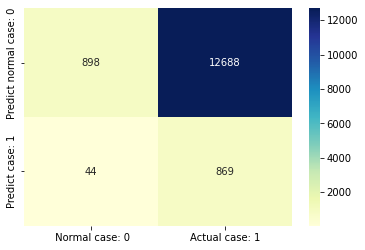

In [ ]:
EPOCH_LIST = [1, 5, 50, 100]
MODEL_LIST = ["simple", "big"]
BASE = ["ACP SYMBO"]

BATCH_SIZE = 1024
LEARNING_RATE = 0.01
MOMENTUM = 0.9
OUTPUT_SIZE = 1

result_tab = []

for element in BASE :

  train_data = TrainData(torch.FloatTensor(x_train_ACP_symbo), torch.FloatTensor(y_train_ACP_symbo))
  test_data = TestData(torch.FloatTensor(x_test_ACP_symbo), torch.FloatTensor(y_test_ACP_symbo))
  
  INPUT_SIZE = 69
  

  ## mise en place d'un WeightedRandomSampler qui permet de garder la distribution dans chaque batchs
  class_count = np.array([np.sum(y_train == 0),np.sum(y_train == 1)])
  weight = 1./class_count
  samples_weight = np.array([weight[t] for t in y_train])
  samples_weight = torch.from_numpy(samples_weight)
  sampler = torch.utils.data.sampler.WeightedRandomSampler(samples_weight, len(samples_weight))

  train_loader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, sampler = sampler)
  test_loader = DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle = False)




  for element_bis in MODEL_LIST :
    if(element_bis == "simple"):
      model = MLP_simple(INPUT_SIZE, OUTPUT_SIZE)
    elif(element_bis == "big"):
      model = MLP_big(INPUT_SIZE, OUTPUT_SIZE)
    else : 
      print("prblm model")
      pass

    for element_ter in EPOCH_LIST :

      print(element, " " , element_bis, " ", element_ter, " ")
      print("")

      start_time_exec = time.time()

      tab = []
      tab.append(element)
      tab.append(INPUT_SIZE)
      tab.append(OUTPUT_SIZE)
      tab.append(element_bis)
      

      EPOCHS = element_ter
      tab.append(EPOCHS)

      criterion = nn.BCELoss()
      optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum = MOMENTUM)
      
      tab.append("BCELoss")
      tab.append("SGD")

      losses = train_model(EPOCHS, model, train_loader, x_train_ACP_symbo, y_train_ACP_symbo)

      print("")
      plt.plot(losses)
      plt.title("Evolution de la fonction de perte")
      plt.xlabel("EPOCHS")
      plt.ylabel("Loss")
      plt.show()
      print("")
      
      pred, actuals = eval_model(model, test_loader)

      tab = metric(pred, actuals, tab)
      
      temps_exec = round((time.time() - start_time_exec),2)
      tab.append(temps_exec)

      result_tab.append(tab)
      print("")
      print("")
      print("")
      print("")
      print("")

▶ Export des résultats 

In [ ]:
result = pd.DataFrame(result_tab, columns=["DataSet", "Input Size", "Output Size", "Model", "Nbr EPOCHS", "Criterion", "Optimizer", "True 0", "True 1", "False 0", "False 1", "AUC", "Sensitivity", "Specificity", "Precision", "Error rate", "F_mesure", "tps exec"])
result
file_name = "result_mlp_acp_symbo.csv"
result.to_csv(file_name, index=False, sep = ';')
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
result = pd.DataFrame(result_tab, columns=["DataSet", "Input Size", "Output Size", "Model", "Nbr EPOCHS", "Criterion", "Optimizer", "True 0", "True 1", "False 0", "False 1", "AUC", "Sensitivity", "Specificity", "Precision", "Error rate", "F_mesure", "tps exec"])
result

,DataSet,Input Size,Output Size,Model,Nbr EPOCHS,Criterion,Optimizer,True 0,True 1,False 0,False 1,AUC,Sensitivity,Specificity,Precision,Error rate,F_mesure,tps exec
0,NORMAL SYMBO,366,1,simple,1,BCELoss,SGD,9931,794,3655,119,0.74,0.73,0.87,0.99,0.26,0.84,3.83
1,NORMAL SYMBO,366,1,simple,5,BCELoss,SGD,10949,756,2637,157,0.81,0.81,0.83,0.99,0.19,0.89,16.36
2,ACP,23,1,simple,1,BCELoss,SGD,9526,747,4060,166,0.71,0.70,0.82,0.98,0.29,0.82,1.38
3,ACP,23,1,simple,5,BCELoss,SGD,10832,663,2754,250,0.79,0.80,0.73,0.98,0.21,0.88,4.10
4,ACP SYMBO,69,1,simple,1,BCELoss,SGD,814,872,12772,41,0.12,0.06,0.96,0.95,0.88,0.11,1.79
5,ACP SYMBO,69,1,simple,5,BCELoss,SGD,810,873,12776,40,0.12,0.06,0.96,0.95,0.88,0.11,5.69


▶ Parti de test du notebook :

-> Test de MLP seul
-> Test d'un affichage pywidget pour les metrics (non retenus)

In [ ]:
INPUT_SIZE = 366
OUTPUT_SIZE = 1
EPOCHS = 5
BATCH_SIZE = 1024
LEARNING_RATE = 0.01
MOMENTUM = 0.9

In [ ]:
train_data = TrainData(torch.FloatTensor(x_train_symbo), torch.FloatTensor(y_train_symbo))
test_data = TestData(torch.FloatTensor(x_test_symbo), torch.FloatTensor(y_test_symbo))

class_count = np.array([np.sum(y_train_symbo == 0),np.sum(y_train_symbo == 1)])
weight = 1./class_count
#print(weight)
samples_weight = np.array([weight[t] for t in y_train_symbo])
samples_weight = torch.from_numpy(samples_weight)
sampler = torch.utils.data.sampler.WeightedRandomSampler(samples_weight, len(samples_weight))

#shuffle = True,
train_loader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, sampler = sampler)
test_loader = DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle = False)

#single_batch = next(iter(train_loader))
#print(single_batch[0].shape)

In [ ]:
model = MLP_simple(INPUT_SIZE, OUTPUT_SIZE)
print(model)

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum = MOMENTUM)

MLP_simple(
  (hidden1): Linear(in_features=366, out_features=1, bias=True)
  (act1): Sigmoid()
)


In [ ]:
losses = train_model(EPOCHS, model, train_loader, x_train_symbo, y_train_symbo)

plt.plot(losses)
plt.title("Evolution de la fonction de perte")
plt.xlabel("EPOCHS")
plt.ylabel("Loss")
plt.show()

In [ ]:
#pred, actuals = eval_model(model, test_loader)
#print(pred)
#print(actuals)

In [ ]:
#tabt=[]
#tabt = metric(pred, actuals, tabt)

In [ ]:
data = ["/", "Confusion matrix", "Accuracy", "Sensitivity", "Specificity"]
dropdown_analyse = widgets.Dropdown(options = data, value="/", description = "Choisissez une metric : ")

def dropdown_eventhandler(change):
  with output_boxplot :
    output_boxplot.clear_output()
    #print(dropdown_analyse.value)

    tn, fp, fn, tp = confusion_matrix(actuals, pred).ravel()
    
    if(dropdown_analyse.value == "Accuracy"):
      AUC=accuracy_score(actuals, pred)
      print(AUC)
      fpr_keras, tpr_keras, thresholds_keras=roc_curve(actuals,pred) 
      plt.plot(fpr_keras,tpr_keras,label='Keras Model(area={:.3f})'.format(AUC)) 
      plt.xlabel('False Positive Rate') 
      plt.ylabel('True Positive Rate') 
      plt.title('ROC curve') 
      plt.legend(loc='best') 
      plt.show() 
    
    elif (dropdown_analyse.value == "Sensitivity"):
      specificity = tp / (tp+fn)
      print(specificity)
    
    elif (dropdown_analyse.value == "Specificity"):
      specificity = tn / (tn+fp)
      print(specificity)

    elif (dropdown_analyse.value == "Confusion matrix"):
      cm = confusion_matrix(actuals, pred)
      cm_matrix = pd.DataFrame(data=cm, columns=[ ' Normal case: 0','Actual case: 1'],  

                                 index=[ 'Predict normal case: 0','Predict case: 1']) 
      sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu') 
 

dropdown_analyse.observe(dropdown_eventhandler, names="value")
display(dropdown_analyse)
output_boxplot = widgets.Output()
display(output_boxplot) 